In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

## OPTIMIZATION APPROACH 1: Drop More Columns

In [3]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME', and 'SPECIAL_CONSIDERATIONS'
application_df = application_df.drop(columns=["EIN", "NAME", "SPECIAL_CONSIDERATIONS"], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT  ASK_AMT  IS_SUCCESSFUL  
0   Association       1              0     5000              1  
1  Co-operative       1         1-9999   108590              1  
2   Association       1              0     5000              0  
3         Trust       1    10000-24999     6692              1  
4         Trust       1  100000-499999   142590              1

In [4]:
# Determine the number of unique values in each column.

# Generate categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

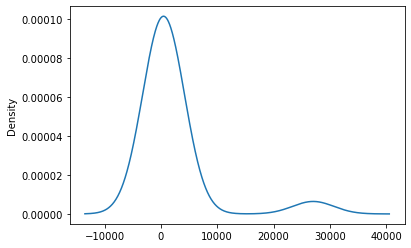

In [6]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than 200
replace_application = list(application_type_counts[application_type_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

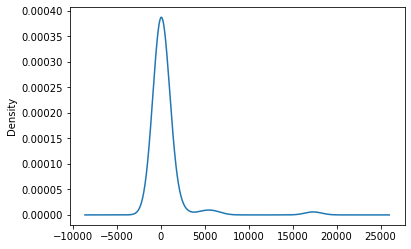

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than 1800
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  ORGANIZATION_Trust  INCOME_AMT_0  \
0                           0.0  ...                 0.0           1.0   
1                           0.0  ...                 0.0           0.0   
2                           1.0  ...                 0.0           1.0   
3                           1.0  ...                 1.0           0.0   
4                           0.0  ...                 1.0           0.0   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  
0              0.0                0.0  
1              0.0                0.0  
2              0.0                0.0  
3              0.0                0.0  
4              0.0                0.0  

[5 rows x 39 columns]

In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   ORGANIZATION_Trust  INCOME_AMT_0  INCOME_AMT_1-9999  \
0                 0.0           1.0                0.0   
1                 0.0           0.0                1.0   
2                 0.0           1.0                0.0   
3                 1.0           0.0                0.0   
4                 1.0           0.0                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 42 columns]

In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3360      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Create a callback checkpoint path

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weightsOpt1.{epoch:02d}.hdf5"

In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    # checkpoint directory and file structure previously defined
    filepath=checkpoint_path,
    # notify when a checkpoint is being saved to the directory
    verbose=1,
    # checkpoint files take up minimal space by saving weights only
    save_weights_only=True,
    # checkpoints will be saved every 5 epochs
    save_freq=5)

In [20]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 17:37 - loss: 351.2820 - accuracy: 0.5625
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
  6/804 [..............................] - ETA: 8s - loss: 5995.8218 - accuracy: 0.5417  
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
 15/804 [..............................] - ETA: 6s - loss: 14721.2539 - accuracy: 0.5146
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
 25/804 [..............................] - ETA: 6s - loss: 13869.0371 - accuracy: 0.4837
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
 34/804 [>.............................] - ETA: 5s - loss: 15888.7148 - accuracy: 0.4835
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
 40/804 [>.............................] - ETA: 6s - loss: 13748.4219 - accuracy: 

370/804 [============>.................] - ETA: 3s - loss: 27461.8301 - accuracy: 0.4989
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
380/804 [=============>................] - ETA: 3s - loss: 27042.6973 - accuracy: 0.4981
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
390/804 [=============>................] - ETA: 3s - loss: 26426.2520 - accuracy: 0.4975
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
400/804 [=============>................] - ETA: 2s - loss: 26025.1406 - accuracy: 0.4963
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 25453.3340 - accuracy: 0.4955
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\


Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 66105.4062 - accuracy: 0.4957
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
785/804 [============================>.] - ETA: 0s - loss: 65281.5039 - accuracy: 0.4959
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
795/804 [============================>.] - ETA: 0s - loss: 64560.7695 - accuracy: 0.4963
Epoch 1: saving model to checkpoints\weightsOpt1.01.hdf5
804/804 [==============================] - 7s 7ms/step - loss: 64011.6836 - accuracy: 0.4965
Epoch 2/100

Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
  1/804 [..............................] - ETA: 19s - loss: 409.3599 - accuracy: 0.3750
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
 11/804 [.............

346/804 [===========>..................] - ETA: 3s - loss: 114627.2969 - accuracy: 0.4945
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
356/804 [============>.................] - ETA: 3s - loss: 111407.9922 - accuracy: 0.4951
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
365/804 [============>.................] - ETA: 3s - loss: 108661.7969 - accuracy: 0.4949
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
369/804 [============>.................] - ETA: 3s - loss: 107484.3047 - accuracy: 0.4953
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
376/804 [=============>................] - ETA: 3s - loss: 105483.3594 - accuracy: 0.4964
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
385/804 [=============>................] - ETA: 2s - loss: 103020.3516 - accuracy: 0.4968
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5

E

725/804 [==========================>...] - ETA: 0s - loss: 68921.8672 - accuracy: 0.4873
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 68473.0781 - accuracy: 0.4872
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 67771.7969 - accuracy: 0.4873
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 67262.7734 - accuracy: 0.4869
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 66667.7109 - accuracy: 0.4865
Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt1.02.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 66192.8516 - accuracy: 0.4866
Epoch 2

302/804 [==========>...................] - ETA: 3s - loss: 7326.6753 - accuracy: 0.4832
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 7120.6714 - accuracy: 0.4846
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5
322/804 [===========>..................] - ETA: 3s - loss: 6907.4697 - accuracy: 0.4845
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5
332/804 [===========>..................] - ETA: 3s - loss: 6731.8525 - accuracy: 0.4833
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5
342/804 [===========>..................] - ETA: 3s - loss: 7062.2217 - accuracy: 0.4837
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\weigh

692/804 [========================>.....] - ETA: 0s - loss: 13242.5576 - accuracy: 0.5015
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 13094.4619 - accuracy: 0.5018
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 13295.6709 - accuracy: 0.5009
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 13169.7607 - accuracy: 0.5005
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 13043.9619 - accuracy: 0.5003
Epoch 3: saving model to checkpoints\weightsOpt1.03.hdf5

Epoch 3: saving model to checkpoints\

277/804 [=========>....................] - ETA: 3s - loss: 64898.9258 - accuracy: 0.4852
Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 62491.9570 - accuracy: 0.4872
Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 60652.7773 - accuracy: 0.4879
Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 58758.5000 - accuracy: 0.4881
Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 57104.6484 - accuracy: 0.4876
Epoch 4: saving model to checkpoints\

673/804 [========================>.....] - ETA: 0s - loss: 38659.5742 - accuracy: 0.4932
Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 38366.5312 - accuracy: 0.4930
Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 37843.8555 - accuracy: 0.4928
Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 37367.1875 - accuracy: 0.4924
Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 37156.1289 - accuracy: 0.4922
Epoch 4: saving model to checkpoints\weightsOpt1.04.hdf5

Epoch 4: saving model to checkpoints\


Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5
269/804 [=========>....................] - ETA: 3s - loss: 19618.5488 - accuracy: 0.4986
Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5
279/804 [=========>....................] - ETA: 3s - loss: 19076.8086 - accuracy: 0.4980
Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 18484.9902 - accuracy: 0.4973
Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 17922.1895 - accuracy: 0.4968
Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 17726.8379 - accuracy: 0.4937
Epoch 5: saving model to checkpoints\

664/804 [=======================>......] - ETA: 0s - loss: 10000.5361 - accuracy: 0.5130
Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 9925.0850 - accuracy: 0.5138 
Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 9883.5547 - accuracy: 0.5141
Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 9761.9912 - accuracy: 0.5141
Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 9845.1328 - accuracy: 0.5146
Epoch 5: saving model to checkpoints\weightsOpt1.05.hdf5

Epoch 5: saving model to checkpoints\wei

260/804 [========>.....................] - ETA: 3s - loss: 21395.4258 - accuracy: 0.4882
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5
270/804 [=========>....................] - ETA: 3s - loss: 21297.7695 - accuracy: 0.4877
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5
280/804 [=========>....................] - ETA: 3s - loss: 21501.4414 - accuracy: 0.4878
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5
290/804 [=========>....................] - ETA: 3s - loss: 20863.6172 - accuracy: 0.4862
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5
300/804 [==========>...................] - ETA: 3s - loss: 21026.3945 - accuracy: 0.4855
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5

Epoch 6: saving model to checkpoints\

660/804 [=======================>......] - ETA: 0s - loss: 55485.2891 - accuracy: 0.4876
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 55394.1953 - accuracy: 0.4885
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 54609.0586 - accuracy: 0.4893
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 53932.4023 - accuracy: 0.4902
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 53505.2734 - accuracy: 0.4906
Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt1.06.hdf5
705/804 [=========================>...


Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
209/804 [======>.......................] - ETA: 4s - loss: 12259.0088 - accuracy: 0.5076
Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
216/804 [=======>......................] - ETA: 4s - loss: 12267.6113 - accuracy: 0.5085
Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 13582.0303 - accuracy: 0.5112
Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 13579.5264 - accuracy: 0.5124
Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 13337.7842 - accuracy: 0.5138
Epoch 7: saving model to checkpoints\

601/804 [=====================>........] - ETA: 1s - loss: 12925.4014 - accuracy: 0.5075
Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 12737.1299 - accuracy: 0.5063
Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 13170.4229 - accuracy: 0.5058
Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 13006.1738 - accuracy: 0.5052
Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 12854.0898 - accuracy: 0.5040
Epoch 7: saving model to checkpoints\weightsOpt1.07.hdf5
650/804 [=======================>.....

187/804 [=====>........................] - ETA: 4s - loss: 14584.8506 - accuracy: 0.4992
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5
197/804 [======>.......................] - ETA: 4s - loss: 14964.2539 - accuracy: 0.4997
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5
207/804 [======>.......................] - ETA: 4s - loss: 15628.0957 - accuracy: 0.5026
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 15329.3564 - accuracy: 0.5049
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 14691.3711 - accuracy: 0.5073
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\

587/804 [====================>.........] - ETA: 1s - loss: 16178.4512 - accuracy: 0.5064
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 16840.0703 - accuracy: 0.5051
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 17104.2559 - accuracy: 0.5045
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 16887.3691 - accuracy: 0.5044
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 16675.8574 - accuracy: 0.5039
Epoch 8: saving model to checkpoints\weightsOpt1.08.hdf5

Epoch 8: saving model to checkpoints\

168/804 [=====>........................] - ETA: 4s - loss: 4528.2056 - accuracy: 0.5035
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
178/804 [=====>........................] - ETA: 4s - loss: 7383.6055 - accuracy: 0.4991
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
188/804 [======>.......................] - ETA: 4s - loss: 7607.0059 - accuracy: 0.4962
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
198/804 [======>.......................] - ETA: 4s - loss: 9152.9541 - accuracy: 0.4937
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 8822.7461 - accuracy: 0.4932
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
217/804 [=======>......................] - 

558/804 [===================>..........] - ETA: 1s - loss: 27238.2793 - accuracy: 0.4908
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 26813.5176 - accuracy: 0.4905
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 26537.1875 - accuracy: 0.4893
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 26130.1113 - accuracy: 0.4890
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 25888.3984 - accuracy: 0.4887
Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt1.09.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 25459.7949 - accuracy: 0.4888
Epoch 9

134/804 [====>.........................] - ETA: 4s - loss: 8476.4336 - accuracy: 0.5333
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5
144/804 [====>.........................] - ETA: 4s - loss: 7944.4375 - accuracy: 0.5365
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5
154/804 [====>.........................] - ETA: 4s - loss: 7490.0781 - accuracy: 0.5408
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5
164/804 [=====>........................] - ETA: 4s - loss: 7042.9971 - accuracy: 0.5471
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5
174/804 [=====>........................] - ETA: 4s - loss: 6661.1675 - accuracy: 0.5496
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to checkpo

529/804 [==================>...........] - ETA: 1s - loss: 27040.5293 - accuracy: 0.5253
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 26553.1465 - accuracy: 0.5237
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 26119.4453 - accuracy: 0.5227
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 25658.6543 - accuracy: 0.5222
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 25221.5547 - accuracy: 0.5210
Epoch 10: saving model to checkpoints\weightsOpt1.10.hdf5

Epoch 10: saving model to ch


Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5
120/804 [===>..........................] - ETA: 4s - loss: 1462.4684 - accuracy: 0.5513
Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 1361.8408 - accuracy: 0.5488
Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 1265.4397 - accuracy: 0.5458
Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 1183.0593 - accuracy: 0.5452
Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 1112.0593 - accuracy: 0.5428
Epoch 11: saving model to checkpo

520/804 [==================>...........] - ETA: 1s - loss: 2850.1736 - accuracy: 0.5211
Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 5788.1694 - accuracy: 0.5208
Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 5842.0898 - accuracy: 0.5190
Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 5873.9458 - accuracy: 0.5184
Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 5818.7769 - accuracy: 0.5168
Epoch 11: saving model to checkpoints\weightsOpt1.11.hdf5

Epoch 11: saving model to checkpo

113/804 [===>..........................] - ETA: 3s - loss: 64740.5117 - accuracy: 0.4831
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5
121/804 [===>..........................] - ETA: 4s - loss: 60550.6836 - accuracy: 0.4863
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 57299.1289 - accuracy: 0.4909
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 53482.9531 - accuracy: 0.4947
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 56364.4688 - accuracy: 0.4994
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5

Epoch 12: saving model to ch

496/804 [=================>............] - ETA: 2s - loss: 21283.2441 - accuracy: 0.4986
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5
504/804 [=================>............] - ETA: 1s - loss: 21046.1445 - accuracy: 0.4976
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 20765.8066 - accuracy: 0.4973
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 20371.1680 - accuracy: 0.4976
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 19996.9922 - accuracy: 0.4994
Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt1.12.hdf5
541/804 [===================>

 77/804 [=>............................] - ETA: 5s - loss: 3156.9504 - accuracy: 0.4675
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 2903.8284 - accuracy: 0.4680
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5
 97/804 [==>...........................] - ETA: 5s - loss: 5953.1792 - accuracy: 0.4678
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5
107/804 [==>...........................] - ETA: 5s - loss: 5464.8818 - accuracy: 0.4708
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5
116/804 [===>..........................] - ETA: 4s - loss: 5161.6729 - accuracy: 0.4693
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5
122/804 [===>.....................

467/804 [================>.............] - ETA: 2s - loss: 2763.8159 - accuracy: 0.4944
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5
477/804 [================>.............] - ETA: 2s - loss: 2733.2656 - accuracy: 0.4969
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5
487/804 [=================>............] - ETA: 2s - loss: 2677.9290 - accuracy: 0.4978
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5
497/804 [=================>............] - ETA: 2s - loss: 2624.4431 - accuracy: 0.4984
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5
507/804 [=================>............] - ETA: 2s - loss: 2601.8481 - accuracy: 0.4986
Epoch 13: saving model to checkpoints\weightsOpt1.13.hdf5

Epoch 13: saving model to checkpo

 53/804 [>.............................] - ETA: 5s - loss: 1828.9275 - accuracy: 0.4776
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5
 63/804 [=>............................] - ETA: 5s - loss: 1555.3580 - accuracy: 0.4866
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5
 72/804 [=>............................] - ETA: 4s - loss: 2995.6577 - accuracy: 0.4935
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5
 78/804 [=>............................] - ETA: 5s - loss: 2818.1445 - accuracy: 0.5012
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 2723.7090 - accuracy: 0.5040
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 2637.8372 - accuracy: 0.5081
Epoch

438/804 [===============>..............] - ETA: 2s - loss: 3189.1780 - accuracy: 0.5045
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 3173.8093 - accuracy: 0.5037
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5
458/804 [================>.............] - ETA: 2s - loss: 3183.2776 - accuracy: 0.5040
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5
468/804 [================>.............] - ETA: 2s - loss: 3145.7283 - accuracy: 0.5028
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5
478/804 [================>.............] - ETA: 2s - loss: 3189.2551 - accuracy: 0.5028
Epoch 14: saving model to checkpoints\weightsOpt1.14.hdf5

Epoch 14: saving model to checkpo

 29/804 [>.............................] - ETA: 5s - loss: 2259.6660 - accuracy: 0.4860
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5
 39/804 [>.............................] - ETA: 5s - loss: 1723.1144 - accuracy: 0.4800
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 1426.9265 - accuracy: 0.4719
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 1225.0253 - accuracy: 0.4693
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 1068.4724 - accuracy: 0.4733
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5

Epoch 15: saving model to checkpo


Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 484.7018 - accuracy: 0.5043
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 736.7447 - accuracy: 0.5034
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 728.1185 - accuracy: 0.5027
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 1073.8542 - accuracy: 0.5025
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5
464/804 [================>.............] - ETA: 2s - loss: 1072.7317 - accuracy: 0.5032
Epoch 15: saving model to checkpoints\weightsOpt1.15.hdf5

Epoch 15: saving model to checkpoint


Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
 20/804 [..............................] - ETA: 4s - loss: 27.4320 - accuracy: 0.5078
Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 23.4324 - accuracy: 0.5063
Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 211.5300 - accuracy: 0.5188
Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 543.5229 - accuracy: 0.5169
Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 717.3666 - accuracy: 0.5042
Epoch 16: saving model to checkpoints\we


Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 5675.6509 - accuracy: 0.4840
Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 5600.0376 - accuracy: 0.4853
Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 5476.5352 - accuracy: 0.4857
Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 5375.6641 - accuracy: 0.4863
Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt1.16.hdf5
465/804 [================>.............] - ETA: 2s - loss: 5277.4941 - accuracy: 0.4862
Epoch 16: saving model to checkpo

 11/804 [..............................] - ETA: 4s - loss: 13.5952 - accuracy: 0.5312
Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5
 21/804 [..............................] - ETA: 4s - loss: 7.8723 - accuracy: 0.5357 
Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 7.7669 - accuracy: 0.5252
Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 6.6791 - accuracy: 0.5244
Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 5.7598 - accuracy: 0.5276
Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5

Epoch 17: saving model to checkpoints\weightsO


Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 104.4298 - accuracy: 0.5233
Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 102.1998 - accuracy: 0.5227
Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 99.9606 - accuracy: 0.5226 
Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 98.1356 - accuracy: 0.5235
Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt1.17.hdf5
456/804 [================>.............] - ETA: 2s - loss: 96.1583 - accuracy: 0.5231
Epoch 17: saving model to checkpoints\we


Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
 10/804 [..............................] - ETA: 4s - loss: 14.4632 - accuracy: 0.5188
Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
 17/804 [..............................] - ETA: 5s - loss: 15.8393 - accuracy: 0.5074
Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 22.4177 - accuracy: 0.5162
Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 62.9400 - accuracy: 0.5177
Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
 47/804 [>.............................] - ETA: 5s - loss: 118.5310 - accuracy: 0.5253
Epoch 18: saving model to checkpoints\weig

402/804 [==============>...............] - ETA: 2s - loss: 148.6562 - accuracy: 0.5217
Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 147.4174 - accuracy: 0.5211
Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 144.7946 - accuracy: 0.5212
Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 142.1881 - accuracy: 0.5207
Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 140.6004 - accuracy: 0.5206
Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt1.18.hdf5
447/804 [===============>..............

804/804 [==============================] - 5s 7ms/step - loss: 86.0939 - accuracy: 0.5189
Epoch 19/100
  1/804 [..............................] - ETA: 3s - loss: 0.6561 - accuracy: 0.6562
Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6982 - accuracy: 0.5547
Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.7264 - accuracy: 0.5469
Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.7290 - accuracy: 0.5391
Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.7233 - accuracy: 0.5436
Epoc

394/804 [=============>................] - ETA: 2s - loss: 3.2209 - accuracy: 0.5202
Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5
403/804 [==============>...............] - ETA: 2s - loss: 4.1068 - accuracy: 0.5199
Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5
413/804 [==============>...............] - ETA: 2s - loss: 4.0615 - accuracy: 0.5194
Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5
423/804 [==============>...............] - ETA: 2s - loss: 4.0460 - accuracy: 0.5183
Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 4.0200 - accuracy: 0.5184
Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt


Epoch 19: saving model to checkpoints\weightsOpt1.19.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 3.8380 - accuracy: 0.5261
Epoch 20/100
  1/804 [..............................] - ETA: 4s - loss: 0.6646 - accuracy: 0.6250
Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6961 - accuracy: 0.5417
Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6958 - accuracy: 0.5411
Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5
 29/804 [>.............................] - ETA: 5s - loss: 0.6963 - accuracy: 0.5388
Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5
 39/804 [>.....................

394/804 [=============>................] - ETA: 2s - loss: 0.6935 - accuracy: 0.5366
Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.6936 - accuracy: 0.5353
Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.6936 - accuracy: 0.5350
Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.6935 - accuracy: 0.5352
Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6935 - accuracy: 0.5349
Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt


Epoch 20: saving model to checkpoints\weightsOpt1.20.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6928 - accuracy: 0.5304
Epoch 21/100
  1/804 [..............................] - ETA: 4s - loss: 0.7060 - accuracy: 0.4062
Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6872 - accuracy: 0.5656
Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5266
Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 0.6931 - accuracy: 0.5167
Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5
 40/804 [>.....................

395/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5294
Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5301
Epoch 21: saving model to checkpoints\weightsOpt1.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt

804/804 [==============================] - 5s 6ms/step - loss: 0.6914 - accuracy: 0.5293
Epoch 22/100

Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
  1/804 [..............................] - ETA: 24s - loss: 0.6760 - accuracy: 0.6562
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6873 - accuracy: 0.5625 
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6876 - accuracy: 0.5610
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.6889 - accuracy: 0.5504
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
 41/804 [>...................

396/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5345
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5357
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt

799/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 22: saving model to checkpoints\weightsOpt1.22.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6913 - accuracy: 0.5320
Epoch 23/100
  1/804 [..............................] - ETA: 4s - loss: 0.6856 - accuracy: 0.5938
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5268
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6934 - accuracy: 0.5092
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5312
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch

387/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt

792/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt1.23.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 24/100
  1/804 [..............................] - ETA: 4s - loss: 0.6993 - accuracy: 0.4688
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6968 - accuracy: 0.4883
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
 18/804 [..............................] - ETA: 6s - loss: 0.6959 - accuracy: 0.4948
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
 26/804 [..............................] - ETA: 5s - loss: 0.6941 - accuracy: 0.5084
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5

Epoch


Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5306
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 24: saving model to checkpoints\weightsOpt

788/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 24: saving model to checkpoints\weightsOpt1.24.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 25/100
  1/804 [..............................] - ETA: 4s - loss: 0.6640 - accuracy: 0.7188
Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6868 - accuracy: 0.5625
Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6878 - accuracy: 0.5559
Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch

394/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt1.25.hdf5

Epoch 25: savi

 45/804 [>.............................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5451
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
 53/804 [>.............................] - ETA: 4s - loss: 0.6888 - accuracy: 0.5507
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5464
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5381
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
 75/804 [=>............................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5379
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
 85/804 [==>...........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5397
Epoch 26: saving model 


Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5288
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5289
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5293
Epoch 26: saving model to checkpoints\weightsOpt

790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 26: saving model to checkpoints\weightsOpt1.26.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 27/100

Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
  1/804 [..............................] - ETA: 21s - loss: 0.6632 - accuracy: 0.7188
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6846 - accuracy: 0.5764 
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6889 - accuracy: 0.5469
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
 24/804 [..............................] - ETA: 5s - loss: 0.69

346/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
391/804 [=============>................] - ETA: 3

706/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt1.27.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 27: saving model 

292/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5
302/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5320
Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt


Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt1.28.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 28: saving model to checkpoints\weightsOpt

298/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5300
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5310
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5319
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt

703/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 29: saving model to checkpoints\weightsOpt1.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt

299/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt

704/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 30: saving model to checkpoints\weightsOpt1.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt

300/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5297
Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt


Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt1.31.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 31: saving model to checkpoints\weightsOpt


Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5282
Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5279
Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5281
Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5301
Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
351/804 [============>.................] - ETA: 2


Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt1.32.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 32: saving model to checkpoints\weightsOpt

307/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5328
Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5
327/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5323
Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt


Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt1.33.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 33: saving model to checkpoints\weightsOpt


Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5289
Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 34: saving model to checkpoints\weightsOpt

708/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 34: saving model to checkpoints\weightsOpt1.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt


Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5298
Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5295
Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 35: saving model to checkpoints\weightsOpt


Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt1.35.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 35: saving model to checkpoints\weightsOpt

300/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5340
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt

700/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 36: saving model to checkpoints\weightsOpt1.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt

301/804 [==========>...................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5377
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5379
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5387
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5357
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5
350/804 [============>.................] - ETA: 2

701/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 37: saving model to checkpoints\weightsOpt1.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt

297/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt

702/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 38: saving model to checkpoints\weightsOpt1.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt

293/804 [=========>....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5347
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5
313/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5357
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5
323/804 [===========>..................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5368
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5370
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt

698/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 39: saving model to checkpoints\weightsOpt1.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt

291/804 [=========>....................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5421
Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5
301/804 [==========>...................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5422
Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5427
Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5414
Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5407
Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt


Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt1.40.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 40: saving model to checkpoints\weightsOpt

290/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5
300/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5354
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5354
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt

695/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 41: saving model to checkpoints\weightsOpt1.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt

290/804 [=========>....................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5272
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5277
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5
306/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5282
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5266
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5263
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt

692/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 42: saving model to checkpoints\weightsOpt1.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt

282/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5
292/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5
302/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5313
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt

688/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 43: saving model to checkpoints\weightsOpt1.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt

278/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5328
Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt


Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt1.44.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 44: saving model to checkpoints\weightsOpt

274/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5
284/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5
294/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338
Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5333
Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt


Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt1.45.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 45: saving model to checkpoints\weightsOpt

280/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5
290/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5304
Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5
300/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt


Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt1.46.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 46: saving model to checkpoints\weightsOpt

286/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5295
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
306/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5307
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5301
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt


Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 47: saving model to checkpoints\weightsOpt1.47.hdf5
710/804 [=========================>....] - ETA: 0


Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
252/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
262/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
272/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5325
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
291/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt

647/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt1.48.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 48: saving model 

223/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5343
Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5
233/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5349
Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5366
Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5366
Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt


Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt1.49.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 49: saving model to checkpoints\weightsOpt


Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5303
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5341
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
254/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5342
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
263/804 [========>.....................] - ETA: 3

615/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 50: saving model to checkpoints\weightsOpt1.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt

214/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5349
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5352
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5357
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5370
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5379
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt

610/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 51: saving model to checkpoints\weightsOpt1.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt


Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5260
Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5253
Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5270
Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5280
Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5289
Epoch 52: saving model to checkpoints\weightsOpt

605/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5332
Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt1.52.hdf5
646/804 [=======================>......] - ETA: 1

187/804 [=====>........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5279
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5
197/804 [======>.......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5273
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5
207/804 [======>.......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5
217/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5294
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5
227/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5306
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt

587/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 53: saving model to checkpoints\weightsOpt1.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt

178/804 [=====>........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5399
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5378
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5393
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5386
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5383
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt

587/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5355
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5359
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5360
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5354
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5350
Epoch 54: saving model to checkpoints\weightsOpt1.54.hdf5
632/804 [======================>.......] - ETA: 1


Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5312
Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5283
Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5280
Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5266
Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5248
Epoch 55: saving model to checkpoints\weightsOpt

579/804 [====================>.........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5282
Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5279
Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5282
Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5280
Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5287
Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt1.55.hdf5
624/804 [======================>.......] - ETA: 1

155/804 [====>.........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5248
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5
165/804 [=====>........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5256
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5266
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5285
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5280
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt

535/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5358
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5362
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5357
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt1.56.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5352
Epoch 56: saving model 

115/804 [===>..........................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5459
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5
121/804 [===>..........................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5442
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5
131/804 [===>..........................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5432
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5412
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5412
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt

492/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5352
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5354
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt1.57.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 57: saving model 

 82/804 [==>...........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5370
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5354
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5359
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
117/804 [===>..........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5353
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
131/804 [===>..........................] - ETA: 3

491/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5369
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5370
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5370
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5370
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5364
Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt1.58.hdf5
532/804 [==================>...........] - ETA: 1

 63/804 [=>............................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5362
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5
 73/804 [=>............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5372
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5
 83/804 [==>...........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5358
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5
 92/804 [==>...........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5377
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5370
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5350
Epoch 59: saving model 

453/804 [===============>..............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5292
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5302
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5305
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5309
Epoch 59: saving model to checkpoints\weightsOpt1.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt

 44/804 [>.............................] - ETA: 5s - loss: 0.6933 - accuracy: 0.5121
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5
 54/804 [=>............................] - ETA: 5s - loss: 0.6931 - accuracy: 0.5150
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5
 64/804 [=>............................] - ETA: 5s - loss: 0.6929 - accuracy: 0.5171
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5
 73/804 [=>............................] - ETA: 5s - loss: 0.6933 - accuracy: 0.5107
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5
 79/804 [=>............................] - ETA: 5s - loss: 0.6930 - accuracy: 0.5154
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5
 89/804 [==>...........................] - ETA: 5

434/804 [===============>..............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5262
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5267
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5264
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5275
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5270
Epoch 60: saving model to checkpoints\weightsOpt1.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt

 20/804 [..............................] - ETA: 5s - loss: 0.6969 - accuracy: 0.4953
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 0.6951 - accuracy: 0.5063
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6943 - accuracy: 0.5109
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
 49/804 [>.............................] - ETA: 5s - loss: 0.6937 - accuracy: 0.5153
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.6939 - accuracy: 0.5131
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
 64/804 [=>............................] - ETA: 5s - loss: 0.6935 - accuracy: 0.5161
Epoch 61: saving model 

405/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
454/804 [===============>..............] - ETA: 2

795/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 61: saving model to checkpoints\weightsOpt1.61.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 62/100

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
  1/804 [..............................] - ETA: 18s - loss: 0.6912 - accuracy: 0.5312
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5284 
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5283
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5192
Epo


Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
426/804 [==============>...............] - ETA: 2


Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt1.62.hdf5
804/804 [==============================] - 6s 7ms

327/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5354
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5349
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5345
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5346
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
366/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5343
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
372/804 [============>.................] - ETA: 3

712/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt1.63.hdf5
757/804 [===========================>..] - ETA: 0


Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5
293/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5
302/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5339
Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5
323/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5
333/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5343
Epoch 64: saving model to checkpoints\weightsOpt

677/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 64: saving model to checkpoints\weightsOpt1.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt


Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
249/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5330
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5348
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5356
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5350
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
289/804 [=========>....................] - ETA: 3

618/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt1.65.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 65: saving model 

170/804 [=====>........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5256
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
179/804 [=====>........................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5234
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5231
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5269
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
205/804 [======>.......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5276
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
215/804 [=======>......................] - ETA: 4

539/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5308
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5309
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5309
Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt1.66.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5309
Epoch 66: saving model 

 86/804 [==>...........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5342
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
 95/804 [==>...........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5336
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5340
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
110/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5318
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
116/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5310
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
126/804 [===>..........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5335
Epoch 67: saving model 

450/804 [===============>..............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5261
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5267
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5264
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5268
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5274
Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt1.67.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5283
Epoch 67: saving model 

804/804 [==============================] - 6s 8ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 68/100
  1/804 [..............................] - ETA: 3s - loss: 0.6801 - accuracy: 0.5938
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.6941 - accuracy: 0.5179
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.6896 - accuracy: 0.5437
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.6897 - accuracy: 0.5426
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
 31/804 [>.............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5363
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
 37/80


Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5329
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5308
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5307
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5300
Epoch 68: saving model 

721/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 68: saving model to checkpoints\weightsOpt1.68.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 68: saving model 

277/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5342
Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5337
Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5
292/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5
306/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5
313/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5328
Epoch 69: saving model 


Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5347
Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5341
Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 69: saving model to checkpoints\weightsOpt1.69.hdf5

Epoch 69: savi

348/804 [===========>..................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5294
Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5288
Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt1.70.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5301
Epoch 70: savi

 19/804 [..............................] - ETA: 2s - loss: 0.6889 - accuracy: 0.5477
Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.6890 - accuracy: 0.5464
Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5401
Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5
 70/804 [=>............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5366
Epoch 71: savi


Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 0.6919 - accuracy: 0.5269
Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5287
Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5280
Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt1.71.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5282
Epoch 71: savi

199/804 [======>.......................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5261
Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5288
Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5284
Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5274
Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: savi


Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt1.72.hdf5
750/804 [==========================>...]


Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5269
Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5272
Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5275
Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt1.73.hdf5
432/804 [===============>..............]

 53/804 [>.............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5295
Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5
 69/804 [=>............................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5285
Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5284
Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 74: savi

548/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 74: saving model to checkpoints\weightsOpt1.74.hdf5

Epoch 74: savi

226/804 [=======>......................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5402
Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5389
Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5397
Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5
284/804 [=========>....................]


Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5340
Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt1.75.hdf5
779/804 [============================>.]


Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5332
Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5344
Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt1.76.hdf5

Epoch 76: saving model to checkpoints\w

 71/804 [=>............................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5414
Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5427
Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5436
Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5423
Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: savi


Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt1.77.hdf5
621/804 [======================>.......]

239/804 [=======>......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5288
Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5310
Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5318
Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: savi

727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 78: saving model to checkpoints\weightsOpt1.78.hdf5

Epoch 78: savi

403/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5311
Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5323
Epoch 79: saving model to checkpoints\weightsOpt1.79.hdf5

Epoch 79: savi

 79/804 [=>............................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5400
Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5378
Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5407
Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5426
Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: savi


Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt1.80.hdf5
629/804 [======================>.......]

255/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: savi

749/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt1.81.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 82/1

428/804 [==============>...............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5368
Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5365
Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5362
Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5362
Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt1.82.hdf5

Epoch 82: savi


Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5366
Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5390
Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5351
Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\w

592/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5304
Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5311
Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5311
Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt1.83.hdf5
652/804 [=======================>......]


Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5288
Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5303
Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\w

792/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt1.84.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 85/100
  1/804 [..............................] - ETA: 1s - loss: 0.7013 - accuracy: 0.4375
Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6889 - accuracy: 0.5493
Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hd


Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5290
Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5289
Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5303
Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt1.85.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 85: savi

145/804 [====>.........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 86: savi

650/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt1.86.hdf5
710/804 [=========================>....]


Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5362
Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt1.87.hdf5

Epoch 87: saving model to checkpoints\w

 37/804 [>.............................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5380
Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5307
Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5333
Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5
 97/804 [==>...........................]


Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt1.88.hdf5

Epoch 88: saving model to checkpoints\w


Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5301
Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5319
Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\w


Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 89: saving model to checkpoints\weightsOpt1.89.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 90/100
  1/804 [..............................] - ETA: 1s - los


Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5302
Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5300
Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5300
Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt1.90.hdf5

Epoch 90: savi


Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5214
Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5232
Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5254
Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\w


Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 91: saving model to checkpoints\weightsOpt1.91.hdf5

Epoch 91: saving model to checkpoints\w

316/804 [==========>...................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5408
Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5408
Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5392
Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt1.92.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5390
Epoch 92: savi


Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5276
Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5389
Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5296
Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\w

492/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5288
Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.6919 - accuracy: 0.5276
Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5276
Epoch 93: saving model to checkpoints\weightsOpt1.93.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6919 - accura

158/804 [====>.........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5364
Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5
175/804 [=====>........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5345
Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5283
Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: savi


Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5304
Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt1.94.hdf5

Epoch 94: saving model to checkpoints\w

344/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5340
Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt1.95.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5330
Epoch 95: savi

 29/804 [>.............................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5377
Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5256
Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5278
Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5282
Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: savi

512/804 [==================>...........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5308
Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5307
Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5286
Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt1.96.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5285
Epoch 96: savi


Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5272
Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5285
Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5281
Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5
242/804 [========>.....................]

671/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344
Epoch 97: saving model to checkpoints\weightsOpt1.97.hdf5

Epoch 97: savi


Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt1.98.hdf5

Epoch 98: saving model to checkpoints\w

 36/804 [>.............................] - ETA: 2s - loss: 0.6886 - accuracy: 0.5503
Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.6893 - accuracy: 0.5454
Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5445
Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5391
Epoch 99: savi

528/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt1.99.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 99: savi


Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5262
Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5275
Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5278
Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy:


Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt1.100.hdf5
748/804 [=======

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.8364 - accuracy: 0.6443 - 458ms/epoch - 2ms/step
Loss: 0.8363667726516724, Accuracy: 0.6443148851394653


In [22]:
# Export nn_new model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

### OPTIMIZATION APPROACH 1 RESULT: There was slight improvement in accuracy (0.64 compared to 0.61) but the loss was higher (0.83 compared to 0.64).

## Some Investigating...

In [30]:
# View the features column names
X.columns

Index(['STATUS', 'ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME

<AxesSubplot:>

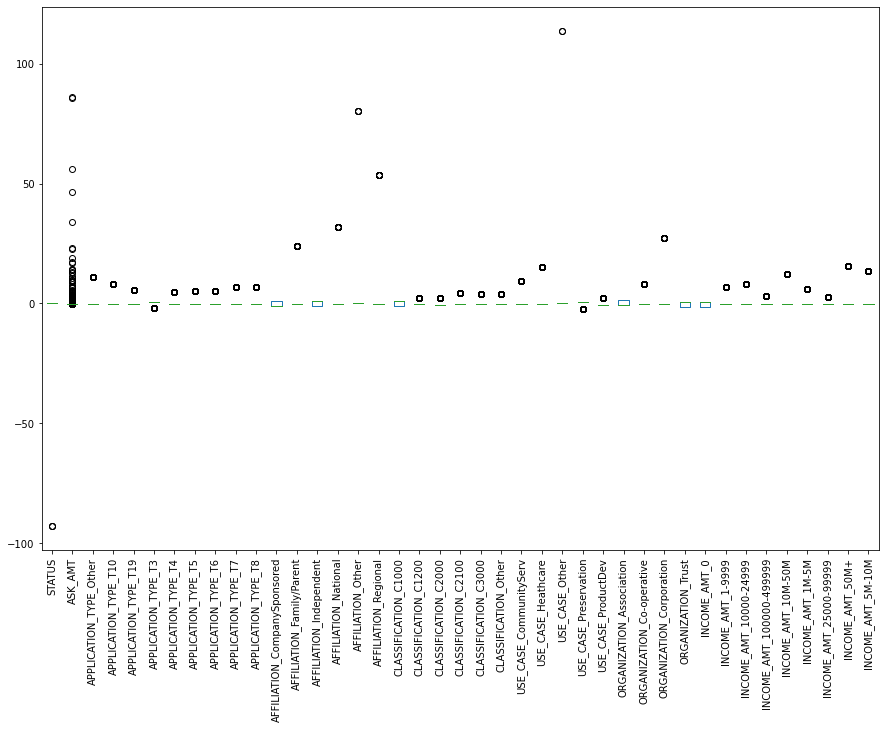

In [39]:
# Investigate the X_train_scaled sample for outliers

Xts_df = pd.DataFrame(X_train_scaled, columns = ['STATUS', 'ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M'])
Xts_df.plot(kind='box', rot=90, figsize=(15,10))

There are some significant outliers in the scaled data for STATUS, ASK_AMT, AFFILIATION_Other, USE_CASE_Other
Consider dropping STATUS, AFFILIATION_Other, and USE_CASE_Other following scaling of test/training data

## OPTIMIZATION APPROACH 2: Drop More Columns, Change Binning, Add Hidden Layer

In [49]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [50]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME','SPECIAL_CONSIDERATIONS', and 'STATUS'
application_df = application_df.drop(columns=["EIN", "NAME", "SPECIAL_CONSIDERATIONS", "STATUS"], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION     INCOME_AMT  ASK_AMT  IS_SUCCESSFUL  
0   Association              0     5000              1  
1  Co-operative         1-9999   108590              1  
2   Association              0     5000              0  
3         Trust    10000-24999     6692              1  
4         Trust  100000-499999   142590              1

In [51]:
# Determine the number of unique values in each column.

# Generate categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

In [52]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

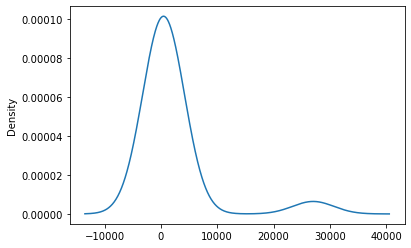

In [53]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [54]:
# Determine which values to replace if counts are less than 1000
replace_application = list(application_type_counts[application_type_counts < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [58]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts.head(10)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

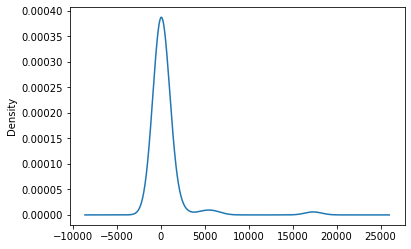

In [56]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [59]:
# Determine which values to replace if counts are less than 1800
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [60]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [61]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                     1.0                   0.0                  0.0   
1                     0.0                   0.0                  1.0   
2                     0.0                   0.0                  0.0   
3                     0.0                   0.0                  1.0   
4                     0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  1.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  AFFILIATION_Family/Parent  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           1.0                        0.0   
3                           1.0                        0.0   
4                           0.0                        0.0   

   AFFILIATION_Independent  AFFILIATION_National  ...  ORGANIZATION_Trust  \
0                      1.0                   0.0  ...                 0.0   
1                      1.0                   0.0  ...                 0.0   
2                      0.0                   0.0  ...                 0.0   
3                      0.0                   0.0  ...                 1.0   
4                      1.0                   0.0  ...                 1.0   

   INCOME_AMT_0  INCOME_AMT_1-9999  INCOME_AMT_10000-24999  \
0           1.0                0.0                     0.0   
1           0.0                1.0                     0.0   
2           1.0                0.0                     0.0   
3           0.0                0.0                     1.0   
4           0.0                0.0                     0.0   

   INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  \
0                       0.0                 0.0               0.0   
1                       0.0                 0.0               0.0   
2                       0.0                 0.0               0.0   
3                       0.0                 0.0               0.0   
4                       1.0                 0.0               0.0   

   INCOME_AMT_25000-99999  INCOME_AMT_50M+  INCOME_AMT_5M-10M  
0                     0.0              0.0                0.0  
1                     0.0              0.0                0.0  
2                     0.0              0.0                0.0  
3                     0.0              0.0                0.0  
4                     0.0              0.0                0.0  

[5 rows x 36 columns]

In [64]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T19  \
0     5000              1                     1.0                   0.0   
1   108590              1                     0.0                   0.0   
2     5000              0                     0.0                   0.0   
3     6692              1                     0.0                   0.0   
4   142590              1                     0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  AFFILIATION_CompanySponsored  \
0                  0.0                           0.0   
1                  0.0                           0.0   
2                  0.0                           1.0   
3                  0.0                           1.0   
4                  0.0                           0.0   

   AFFILIATION_Family/Parent  ...  ORGANIZATION_Trust  INCOME_AMT_0  \
0                        0.0  ...                 0.0           1.0   
1                        0.0  ...                 0.0           0.0   
2                        0.0  ...                 0.0           1.0   
3                        0.0  ...                 1.0           0.0   
4                        0.0  ...                 1.0           0.0   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  
0              0.0                0.0  
1              0.0                0.0  
2              0.0                0.0  
3              0.0                0.0  
4              0.0                0.0  

[5 rows x 38 columns]

In [65]:
# View the application_df columns
application_df.columns

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M'],
      dtyp

In [66]:
# Split our preprocessed data into our features and target arrays
# Also drop features 'USE_CASE_Other' and 'AFFILIATION_Other'
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL", "AFFILIATION_Other", "USE_CASE_Other"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [67]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [68]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                2880      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Create a callback checkpoint path

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weightsOpt2.{epoch:02d}.hdf5"

In [70]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [71]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    # checkpoint directory and file structure previously defined
    filepath=checkpoint_path,
    # notify when a checkpoint is being saved to the directory
    verbose=1,
    # checkpoint files take up minimal space by saving weights only
    save_weights_only=True,
    # checkpoints will be saved every 5 epochs
    save_freq=5)

In [72]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 7:47 - loss: 23.8502 - accuracy: 0.5625
Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 174.5660 - accuracy: 0.5625 
Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 2886.1392 - accuracy: 0.5292
Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 3538.4353 - accuracy: 0.5160
Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

E


Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5
473/804 [================>.............] - ETA: 1s - loss: 27997.4004 - accuracy: 0.4869
Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5
490/804 [=================>............] - ETA: 1s - loss: 27746.6816 - accuracy: 0.4857
Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5
508/804 [=================>............] - ETA: 1s - loss: 26801.8906 - accuracy: 0.4873
Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt2.01.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 26060.8496 - accuracy: 0.4888
Epoch 1: 

126/804 [===>..........................] - ETA: 2s - loss: 5419.1313 - accuracy: 0.5203
Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 5514.1514 - accuracy: 0.5129
Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 5176.8115 - accuracy: 0.5068
Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 4868.8193 - accuracy: 0.5044
Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: savi


Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 14230.8857 - accuracy: 0.4979
Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 13933.3027 - accuracy: 0.5000
Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 13617.0947 - accuracy: 0.4997
Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt2.02.hdf5
661/804 [=======================>......]

278/804 [=========>....................] - ETA: 1s - loss: 37689.2812 - accuracy: 0.5226
Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 35809.2266 - accuracy: 0.5252
Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 34394.0664 - accuracy: 0.5265
Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 35009.3242 - accuracy: 0.5278
Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: 

742/804 [==========================>...] - ETA: 0s - loss: 31992.8887 - accuracy: 0.5172
Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 31398.0977 - accuracy: 0.5169
Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 30913.3730 - accuracy: 0.5162
Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5
787/804 [============================>.] - ETA: 0s - loss: 30356.6445 - accuracy: 0.5149
Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt2.03.hdf5

Epoch 3: 

403/804 [==============>...............] - ETA: 1s - loss: 6232.7437 - accuracy: 0.4926
Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 6021.4390 - accuracy: 0.4927
Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 6372.8394 - accuracy: 0.4926
Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 6326.1147 - accuracy: 0.4934
Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt2.04.hdf5

Epoch 4: savi

 59/804 [=>............................] - ETA: 2s - loss: 4388.7915 - accuracy: 0.4560
Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 3957.5151 - accuracy: 0.4599
Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 24231.1816 - accuracy: 0.4537
Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 21695.7910 - accuracy: 0.4564
Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: sa


Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 5198.6772 - accuracy: 0.4778
Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 5314.6533 - accuracy: 0.4799
Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 5271.8896 - accuracy: 0.4814
Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt2.05.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 5146.2407 - accuracy: 0.4820
Epoch 5: savi

186/804 [=====>........................] - ETA: 2s - loss: 1056.5850 - accuracy: 0.5002
Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 1012.0495 - accuracy: 0.4981
Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 953.8738 - accuracy: 0.4964 
Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 918.5325 - accuracy: 0.4961
Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: savin

663/804 [=======================>......] - ETA: 0s - loss: 503.5104 - accuracy: 0.5018
Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 509.2040 - accuracy: 0.5016
Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 506.8545 - accuracy: 0.5032
Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 582.3561 - accuracy: 0.5033
Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt2.06.hdf5

Epoch 6: saving m


Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 21.7261 - accuracy: 0.5338
Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5
356/804 [============>.................] - ETA: 1s - loss: 20.8468 - accuracy: 0.5331
Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5
371/804 [============>.................] - ETA: 1s - loss: 20.0386 - accuracy: 0.5322
Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5
386/804 [=============>................] - ETA: 1s - loss: 19.2929 - accuracy: 0.5314
Epoch 7: saving model to checkpoints\weightsOpt2.07.hdf5

Epoch 7: saving model

  1/804 [..............................] - ETA: 1s - loss: 0.7891 - accuracy: 0.4375
Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.7295 - accuracy: 0.5254
Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.7326 - accuracy: 0.5192
Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.7262 - accuracy: 0.5278
Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to 


Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.7091 - accuracy: 0.5292
Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.7088 - accuracy: 0.5293
Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.7082 - accuracy: 0.5302
Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.7077 - accuracy: 0.5306
Epoch 8: saving model to checkpoints\weightsOpt2.08.hdf5

Epoch 8: saving model to 


Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.6938 - accuracy: 0.5300
Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.6938 - accuracy: 0.5297
Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.6943 - accuracy: 0.5272
Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.6942 - accuracy: 0.5274
Epoch 9: saving model to 

613/804 [=====================>........] - ETA: 0s - loss: 0.6924 - accuracy: 0.5317
Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6922 - accuracy: 0.5326
Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6923 - accuracy: 0.5320
Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6922 - accuracy: 0.5322
Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt2.09.hdf5

Epoch 9: saving model to 


Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5278
Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5274
Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5279
Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5285
Epoch 10: savi


Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt2.10.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 10: savi

405/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt2.11.hdf5

Epoch 11: savi

 61/804 [=>............................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5251
Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: savi


Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt2.12.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 12: savi

187/804 [=====>........................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5366
Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5394
Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5397
Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5408
Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: savi


Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt2.13.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 13: savi


Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 14: savi

788/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt2.14.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 15/100
  1/804 [..............................] - ETA: 1s - loss: 0.6989 - accuracy: 0.4688
Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6943 - accuracy: 0.5059
Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.6931 - accuracy: 0.5162
Epoch 15: saving model to chec

450/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt2.15.hdf5

Epoch 15: savi

105/804 [==>...........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5244
Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5227
Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5280
Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: savi


Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 16: saving model to checkpoints\weightsOpt2.16.hdf5

Epoch 16: savi


Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5375
Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5369
Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: savi

706/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt2.17.hdf5

Epoch 17: savi


Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 18: saving model to checkpoints\weightsOpt2.18.hdf5

Epoch 18: savi


Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5212
Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5284
Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5260
Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5228
Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: savi

493/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5285
Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5285
Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt2.19.hdf5

Epoch 19: savi


Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5226
Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5237
Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5222
Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5231
Epoch 20: savi

624/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt2.20.hdf5

Epoch 20: savi

280/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: savi


Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt2.21.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 22/100

Epoch 22: saving model to checkpoints\weightsOpt2.22.hd


Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt2.22.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 22: savi

 72/804 [=>............................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5221
Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5285
Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: savi


Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5351
Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 23: saving model to checkpoints\weightsOpt2.23.hdf5

Epoch 23: savi


Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: savi

673/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt2.24.hdf5

Epoch 24: savi

329/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5353
Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5

Epoch 25: savi


Epoch 25: saving model to checkpoints\weightsOpt2.25.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 26/100
  1/804 [..............................] - ETA: 2s - loss: 0.7039 - accuracy: 0.4375
Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6947 - accuracy: 0.5059
Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5373
Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5
 46/804 [>.............................] - ETA: 2s - los

460/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt2.26.hdf5

Epoch 26: savi

121/804 [===>..........................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5439
Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5425
Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5424
Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5431
Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: savi


Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt2.27.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 27: savi

247/804 [========>.....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: savi


Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt2.28.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 28: savi


Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt2.29.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 29: savi


Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5376
Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5283
Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5260
Epoch 30: savi

509/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5287
Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5280
Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt2.30.hdf5

Epoch 30: savi

165/804 [=====>........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5377
Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5389
Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5392
Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: savi


Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 31: saving model to checkpoints\weightsOpt2.31.hdf5

Epoch 31: savi

297/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: savi


Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt2.32.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 33/100
  1/804 [..............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt2.33.hd


Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 33: saving model to checkpoints\weightsOpt2.33.hdf5

Epoch 33: savi

 91/804 [==>...........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5385
Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5377
Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: savi

563/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt2.34.hdf5

Epoch 34: savi

219/804 [=======>......................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5237
Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5227
Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5221
Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5247
Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: savi


Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt2.35.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 35: savi


Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt2.36.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 36: savi


Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6941 - accuracy: 0.5098
Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5192
Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5258
Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5266
Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: savi


Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 37: saving model to checkpoints\weightsOpt2.37.hdf5

Epoch 37: savi

147/804 [====>.........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5247
Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5258
Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5275
Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: savi

621/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 38: saving model to checkpoints\weightsOpt2.38.hdf5

Epoch 38: savi


Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5275
Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: savi


Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt2.39.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 40/1


Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt2.40.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 40: savi


Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5274
Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5250
Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: savi

540/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt2.41.hdf5

Epoch 41: savi

196/804 [======>.......................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5255
Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5256
Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5277
Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: savi


Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt2.42.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 42: savi

327/804 [===========>..................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5

Epoch 43: savi


Epoch 43: saving model to checkpoints\weightsOpt2.43.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 44/100
  1/804 [..............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5216
Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5220
Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5189
Epoch 44: saving model to chec

458/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt2.44.hdf5

Epoch 44: savi


Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5425
Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: savi

579/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt2.45.hdf5

Epoch 45: savi


Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352
Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: savi


Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt2.46.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 46: savi


Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt2.47.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 47: savi

 22/804 [..............................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5426
Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5
 52/804 [>.............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5
 67/804 [=>............................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5224
Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: savi


Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 48: saving model to checkpoints\weightsOpt2.48.hdf5

Epoch 48: savi

141/804 [====>.........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5381
Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5368
Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5364
Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: savi

598/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt2.49.hdf5

Epoch 49: savi


Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5408
Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5420
Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5432
Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5417
Epoch 50: savi

729/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt2.50.hdf5

Epoch 50: savi


Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 51: saving model to checkpoints\weightsOpt2.51.hdf5

Epoch 51: savi


Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5229
Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5201
Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5238
Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5280
Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: savi


Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 52: saving model to checkpoints\weightsOpt2.52.hdf5

Epoch 52: savi

162/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: savi


Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt2.53.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 53: savi


Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5357
Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: savi


Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt2.54.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 55/100
  1/804 [..............................] - ETA: 1s - los


Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 55: saving model to checkpoints\weightsOpt2.55.hdf5

Epoch 55: savi

 75/804 [=>............................] - ETA: 2s - loss: 0.6887 - accuracy: 0.5504
Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5408
Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5408
Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5381
Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.6912 - accura

545/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5289
Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5297
Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt2.56.hdf5

Epoch 56: savi


Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5419
Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5405
Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5394
Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5396
Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: savi

676/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt2.57.hdf5

Epoch 57: savi


Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt2.58.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 58: savi

804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 59/100
  1/804 [..............................] - ETA: 2s - loss: 0.7103 - accuracy: 0.3750
Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.6973 - accuracy: 0.4808
Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5179
Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 59: saving model to chec


Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt2.59.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 59: savi

119/804 [===>..........................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5399
Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5401
Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5407
Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5393
Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: savi

579/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt2.60.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accura

209/804 [======>.......................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5386
Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5382
Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5383
Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5378
Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.6902 - accura

635/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt2.61.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 61: saving model to checkpoints\weightsOpt

256/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: savi


Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 62: saving model to checkpoints\weightsOpt2.62.hdf5

Epoch 62: savi

367/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt2.63.hdf5

Epoch 63: savi


Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346
Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5327
Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5383
Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: savi

493/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt2.64.hdf5

Epoch 64: savi


Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5291
Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5295
Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 65: savi

624/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt2.65.hdf5

Epoch 65: savi

285/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5289
Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: savi

755/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt2.66.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 67/100

Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5
  1/804 [..............................] - ETA: 11s - lo


Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt2.67.hdf5

Epoch 67: savi


Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5342
Epoch 68: savi

547/804 [===================>..........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5358
Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5351
Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt2.68.hdf5
602/804 [======


Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: savi

673/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt2.69.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accura

329/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5

Epoch 70: savi


Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt2.70.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 71/100
  1/804 [..............................] - ETA: 2s - loss: 0.7116 - accuracy: 0.3750
Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6947 - accuracy: 0.5042
Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5219
Epoch 71: saving model to chec

445/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt2.71.hdf5

Epoch 71: savi

 96/804 [==>...........................] - ETA: 3s - loss: 0.6891 - accuracy: 0.5469
Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 0.6888 - accuracy: 0.5490
Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.6892 - accuracy: 0.5464
Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5434
Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: savi


Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5333
Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt2.72.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 72: savi


Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 73: savi

697/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt2.73.hdf5

Epoch 73: savi

358/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt2.74.hdf5

Epoch 74: savi

 14/804 [..............................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5179
Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5248
Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: savi


Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 75: saving model to checkpoints\weightsOpt2.75.hdf5

Epoch 75: savi


Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5359
Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: savi


Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt2.76.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 76: savi

276/804 [=========>....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: savi


Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt2.77.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 78/1


Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt2.78.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 78: savi


Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5205
Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5238
Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5255
Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5225
Epoch 79: savi

533/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt2.79.hdf5

Epoch 79: savi

184/804 [=====>........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5
239/804 [======

649/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt2.80.hdf5

Epoch 80: savi


Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5357
Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5363
Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: savi

779/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt2.81.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 82/100

Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5
  1/804 [..............................] - ETA: 10s - loss: 0.6811 - accuracy: 0.6250
Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5488 
Epoch 82: saving model to ch


Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt2.82.hdf5

Epoch 82: savi

 82/804 [==>...........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5354
Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5376
Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: savi


Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 83: saving model to checkpoints\weightsOpt2.83.hdf5

Epoch 83: savi

193/804 [======>.......................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5225
Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5237
Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5256
Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5269
Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: savi

653/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt2.84.hdf5

Epoch 84: savi

309/804 [==========>...................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5381
Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5364
Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5357
Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: savi


Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 85: saving model to checkpoints\weightsOpt2.85.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 86/100
  1/804 [..............................] - ETA: 1s - loss: 0.6878 - accuracy: 0.5625
Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5417
Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: saving model to chec


Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 86: saving model to checkpoints\weightsOpt2.86.hdf5

Epoch 86: savi


Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 87: savi

566/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt2.87.hdf5

Epoch 87: savi


Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: savi

687/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt2.88.hdf5

Epoch 88: savi

347/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt2.89.hdf5

Epoch 89: savi

Epoch 90/100
  1/804 [..............................] - ETA: 2s - loss: 0.6989 - accuracy: 0.4688
Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6931 - accuracy: 0.5156
Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5412
Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

E


Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5358
Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 90: saving model to checkpoints\weightsOpt2.90.hdf5

Epoch 90: savi


Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5260
Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5278
Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 91: savi

595/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt2.91.hdf5

Epoch 91: savi

256/804 [========>.....................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5385
Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5391
Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5372
Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5358
Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: savi


Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt2.92.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 92: savi

382/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt2.93.hdf5

Epoch 93: savi

 43/804 [>.............................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5254
Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5237
Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5257
Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5277
Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: savi


Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt2.94.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 94: savi


Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: savi

644/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt2.95.hdf5

Epoch 95: savi

300/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.6917 - accura

770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt2.96.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6910 - accuracy: 0.5324
Epoch 97/100

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5
  1/804 [..............................] - ETA: 11s - loss: 0.6808 - accuracy: 0.5938
Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5
 16/804 [..............................] - ETA: 3s - lo

431/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt2.97.hdf5

Epoch 97: savi

 87/804 [==>...........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5230
Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5236
Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5235
Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5258
Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: savi


Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 98: saving model to checkpoints\weightsOpt2.98.hdf5

Epoch 98: savi


Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5269
Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: savi

678/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt2.99.hdf5

Epoch 99: savi

324/804 [===========>..................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5253
Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5287
Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5289
Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.10

779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt2.100.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324


In [73]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7954 - accuracy: 0.5324 - 383ms/epoch - 1ms/step
Loss: 0.7953664064407349, Accuracy: 0.5323615074157715


In [74]:
# Export nn_new model to HDF5 file
nn.save("AlphabetSoupCharity2.h5")

### OPTIMIZATION APPROCH 2 RESULT: There was significant decrease in accuracy (0.53 compared to 0.61) and still the loss was higher (0.80 compared to 0.64).

## Some more investigating...

In [92]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [93]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME", "ASK_AMT"], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  IS_SUCCESSFUL  
0   Association       1              0                      N              1  
1  Co-operative       1         1-9999                      N              1  
2   Association       1              0                      N              0  
3         Trust       1    10000-24999                      N              1  
4         Trust       1  100000-499999                      N              1

In [94]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [95]:
# Determine which values to replace if counts are less than 200
replace_application = list(application_type_counts[application_type_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [96]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [97]:
# Determine which values to replace if counts are less than 1800
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [98]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [99]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [100]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0       1              1                     0.0                   1.0   
1       1              1                     0.0                   0.0   
2       1              0                     0.0                   0.0   
3       1              1                     0.0                   0.0   
4       1              1                     0.0                   0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  1.0                  0.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 43 columns]

<AxesSubplot:>

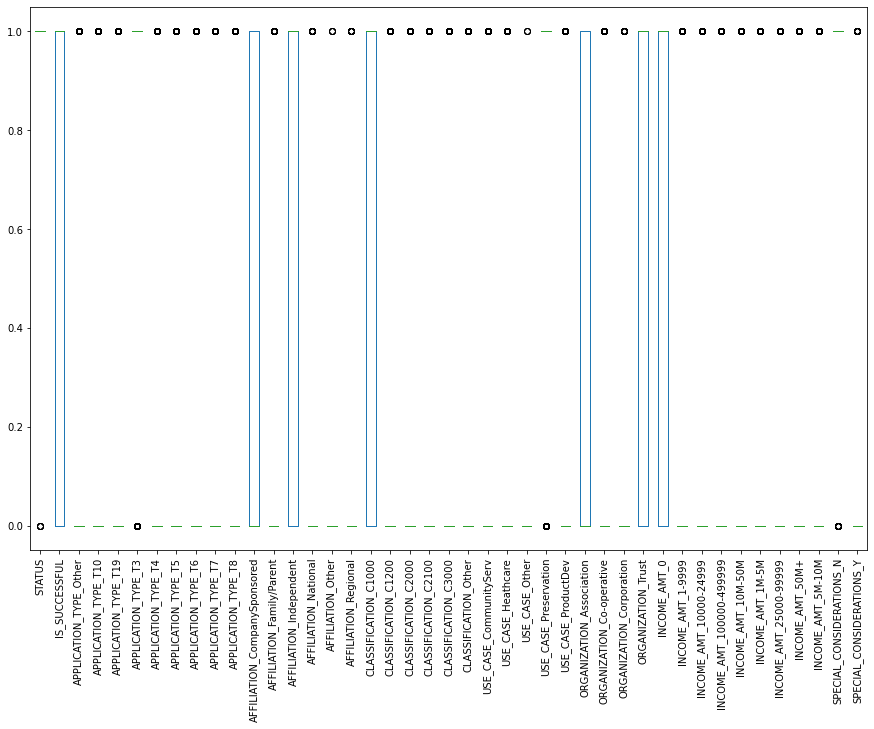

In [101]:
# Plot application_df
application_df.plot(kind='box', rot=90, figsize=(15,10))

In [102]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [103]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

<AxesSubplot:>

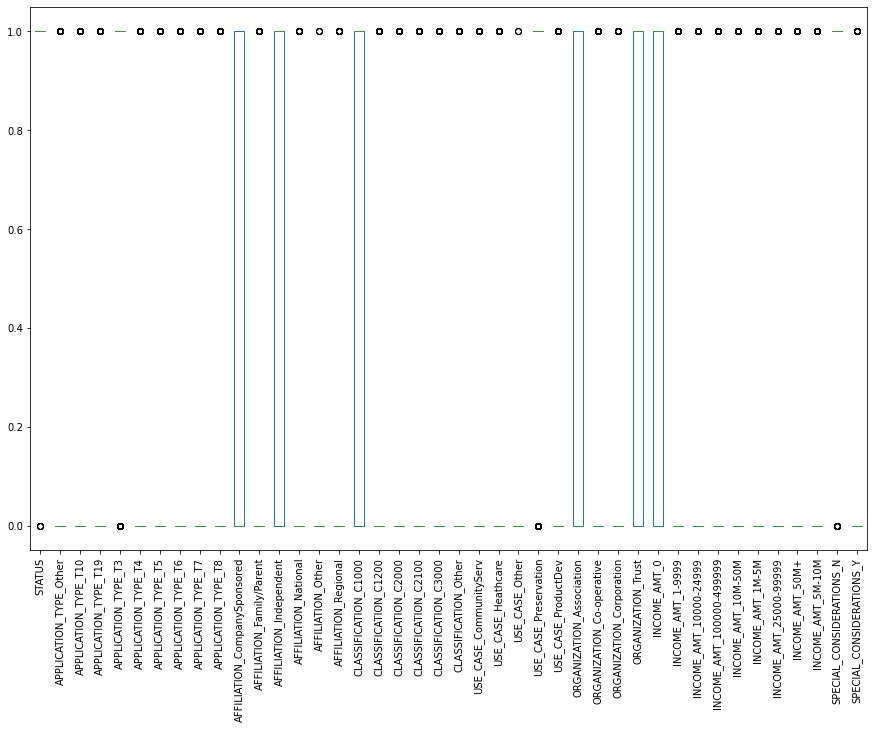

In [104]:
# Plot X
X.plot(kind='box', rot=90, figsize=(15,10))

In [105]:
X.columns

Index(['STATUS', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-

<AxesSubplot:>

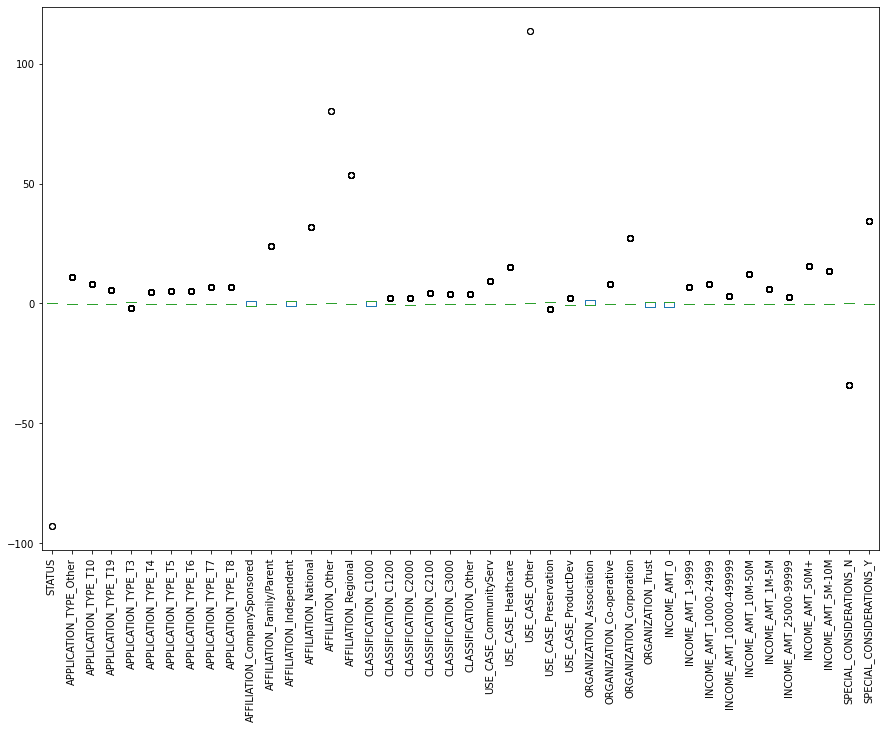

In [107]:
# Investigate the X_train_scaled sample for outliers

Xts_df = pd.DataFrame(X_train_scaled, columns = ['STATUS', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'])
Xts_df.plot(kind='box', rot=90, figsize=(15,10))

After removing the ASK_AMT column, the scaled training data has a smaller number of outliers overall. Since there are negative values in the 'STATUS' and 'SPECIAL_CONSIDERATIONS_N', it might be worth trying the LeakyReLU activation function.

## OPTIMIZATION APPROACH 3: Drop ASK_AMT Column, Add Neurons to first layer, Try Tanh Activation

In [108]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [109]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME', and 'ASK_AMT'
application_df = application_df.drop(columns=["EIN", "NAME", "ASK_AMT"], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  IS_SUCCESSFUL  
0   Association       1              0                      N              1  
1  Co-operative       1         1-9999                      N              1  
2   Association       1              0                      N              0  
3         Trust       1    10000-24999                      N              1  
4         Trust       1  100000-499999                      N              1

In [112]:
# Define APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()

# Define CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()

In [113]:
# Determine which values to replace if counts are less than 200
replace_application = list(application_type_counts[application_type_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [114]:
# Determine which values to replace if counts are less than 1800
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [115]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [116]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [117]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0       1              1                     0.0                   1.0   
1       1              1                     0.0                   0.0   
2       1              0                     0.0                   0.0   
3       1              1                     0.0                   0.0   
4       1              1                     0.0                   0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  1.0                  0.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 43 columns]

In [118]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [119]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [120]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 168 #(3x42)+42
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 168)               7224      
                                                                 
 dense_8 (Dense)             (None, 30)                5070      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 12,325
Trainable params: 12,325
Non-trainable params: 0
_________________________________________________________________


In [121]:
# Create a callback checkpoint path

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weightsOpt3.{epoch:02d}.hdf5"

In [122]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [123]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    # checkpoint directory and file structure previously defined
    filepath=checkpoint_path,
    # notify when a checkpoint is being saved to the directory
    verbose=1,
    # checkpoint files take up minimal space by saving weights only
    save_weights_only=True,
    # checkpoints will be saved every 5 epochs
    save_freq=5)

In [124]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 7:17 - loss: 0.7316 - accuracy: 0.4062
Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6366 - accuracy: 0.6562  
Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.6141 - accuracy: 0.6865
Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.6090 - accuracy: 0.6944
Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: 

475/804 [================>.............] - ETA: 1s - loss: 0.5857 - accuracy: 0.7163
Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5861 - accuracy: 0.7156
Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5853 - accuracy: 0.7168
Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5847 - accuracy: 0.7168
Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to checkpoints\weightsOpt3.01.hdf5

Epoch 1: saving model to 

146/804 [====>.........................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7322
Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5591 - accuracy: 0.7301
Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5602 - accuracy: 0.7279
Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.5583 - accuracy: 0.7294
Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to 

633/804 [======================>.......] - ETA: 0s - loss: 0.5598 - accuracy: 0.7295
Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5598 - accuracy: 0.7293
Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5610 - accuracy: 0.7282
Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5

Epoch 2: saving model to checkpoints\weightsOpt3.02.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5606 - accuracy: 0.7284
Epoch 2: saving model to 

314/804 [==========>...................] - ETA: 1s - loss: 0.5580 - accuracy: 0.7278
Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5574 - accuracy: 0.7291
Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.5579 - accuracy: 0.7289
Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5573 - accuracy: 0.7294
Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5

Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5

Epoch 3: saving model to 

797/804 [============================>.] - ETA: 0s - loss: 0.5584 - accuracy: 0.7283
Epoch 3: saving model to checkpoints\weightsOpt3.03.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5580 - accuracy: 0.7288
Epoch 4/100
  1/804 [..............................] - ETA: 2s - loss: 0.6123 - accuracy: 0.5625
Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5563 - accuracy: 0.7240
Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.5547 - accuracy: 0.7361
Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\wei

475/804 [================>.............] - ETA: 1s - loss: 0.5503 - accuracy: 0.7366
Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5498 - accuracy: 0.7364
Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.5504 - accuracy: 0.7354
Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.5520 - accuracy: 0.7348
Epoch 4: saving model to checkpoints\weightsOpt3.04.hdf5

Epoch 4: saving model to 


Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5
154/804 [====>.........................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7417
Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7407
Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7399
Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5
204/804 [======>.......................] - ETA: 1s -

634/804 [======================>.......] - ETA: 0s - loss: 0.5521 - accuracy: 0.7311
Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5516 - accuracy: 0.7316
Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5515 - accuracy: 0.7317
Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5520 - accuracy: 0.7313
Epoch 5: saving model to checkpoints\weightsOpt3.05.hdf5

Epoch 5: saving model to 

310/804 [==========>...................] - ETA: 1s - loss: 0.5493 - accuracy: 0.7392
Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5499 - accuracy: 0.7389
Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5490 - accuracy: 0.7392
Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5

Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5500 - accuracy: 0.7386
Epoch 6: saving model to checkpoints\weightsOpt3.06.hdf5

Epoch 6: saving model to 

804/804 [==============================] - 3s 3ms/step - loss: 0.5517 - accuracy: 0.7332
Epoch 7/100

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5
  1/804 [..............................] - ETA: 22s - loss: 0.5749 - accuracy: 0.7188
Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5491 - accuracy: 0.7305 
Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5487 - accuracy: 0.7307
Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5
 51/804


Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.5515 - accuracy: 0.7286
Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5517 - accuracy: 0.7290
Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5511 - accuracy: 0.7294
Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5

Epoch 7: saving model to checkpoints\weightsOpt3.07.hdf5
546/804 [===================>..........] - ETA: 0s -


Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5538 - accuracy: 0.7280
Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 0.5510 - accuracy: 0.7305
Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.5487 - accuracy: 0.7326
Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.5505 - accuracy: 0.7313
Epoch 8: saving model to 

661/804 [=======================>......] - ETA: 0s - loss: 0.5498 - accuracy: 0.7324
Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5495 - accuracy: 0.7326
Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5490 - accuracy: 0.7334
Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5487 - accuracy: 0.7341
Epoch 8: saving model to checkpoints\weightsOpt3.08.hdf5

Epoch 8: saving model to 

330/804 [===========>..................] - ETA: 1s - loss: 0.5464 - accuracy: 0.7348
Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5464 - accuracy: 0.7348
Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5476 - accuracy: 0.7334
Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5

Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5481 - accuracy: 0.7340
Epoch 9: saving model to checkpoints\weightsOpt3.09.hdf5

Epoch 9: saving model to 

Epoch 10/100
  1/804 [..............................] - ETA: 1s - loss: 0.5025 - accuracy: 0.7500
Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7285
Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7412
Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7366
Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

E


Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5480 - accuracy: 0.7339
Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5487 - accuracy: 0.7332
Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5473 - accuracy: 0.7349
Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5

Epoch 10: saving model to checkpoints\weightsOpt3.10.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5469 - accuracy: 0.7346
Epoch 10: savi

153/804 [====>.........................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7473
Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7483
Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7488
Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7486
Epoch 11: savi


Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5472 - accuracy: 0.7332
Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5474 - accuracy: 0.7329
Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5471 - accuracy: 0.7330
Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5

Epoch 11: saving model to checkpoints\weightsOpt3.11.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7333
Epoch 11: savi

313/804 [==========>...................] - ETA: 1s - loss: 0.5451 - accuracy: 0.7347
Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5453 - accuracy: 0.7352
Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5465 - accuracy: 0.7348
Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5

Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5463 - accuracy: 0.7342
Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5

Epoch 12: savi


Epoch 12: saving model to checkpoints\weightsOpt3.12.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5467 - accuracy: 0.7330
Epoch 13/100
  1/804 [..............................] - ETA: 1s - loss: 0.4317 - accuracy: 0.8438
Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7390
Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7370
Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hd


Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5457 - accuracy: 0.7345
Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5455 - accuracy: 0.7341
Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5458 - accuracy: 0.7343
Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\weightsOpt3.13.hdf5

Epoch 13: saving model to checkpoints\w

162/804 [=====>........................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7348
Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.5435 - accuracy: 0.7341
Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7335
Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7357
Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: savi

653/804 [=======================>......] - ETA: 0s - loss: 0.5440 - accuracy: 0.7343
Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5453 - accuracy: 0.7336
Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5453 - accuracy: 0.7333
Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5453 - accuracy: 0.7336
Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: saving model to checkpoints\weightsOpt3.14.hdf5

Epoch 14: savi

323/804 [===========>..................] - ETA: 1s - loss: 0.5472 - accuracy: 0.7279
Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5457 - accuracy: 0.7285
Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7284
Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5

Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7300
Epoch 15: saving model to checkpoints\weightsOpt3.15.hdf5

Epoch 15: savi

804/804 [==============================] - 3s 3ms/step - loss: 0.5454 - accuracy: 0.7332
Epoch 16/100
  1/804 [..............................] - ETA: 1s - loss: 0.5627 - accuracy: 0.7188
Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5657 - accuracy: 0.7270
Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.5505 - accuracy: 0.7348
Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5
 53/804 [>.............................] - ETA: 2s - los

479/804 [================>.............] - ETA: 1s - loss: 0.5463 - accuracy: 0.7317
Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5463 - accuracy: 0.7321
Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5475 - accuracy: 0.7310
Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5470 - accuracy: 0.7311
Epoch 16: saving model to checkpoints\weightsOpt3.16.hdf5

Epoch 16: savi


Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7402
Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7377
Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7377
Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\w

646/804 [=======================>......] - ETA: 0s - loss: 0.5405 - accuracy: 0.7369
Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5409 - accuracy: 0.7368
Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5418 - accuracy: 0.7367
Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5417 - accuracy: 0.7369
Epoch 17: saving model to checkpoints\weightsOpt3.17.hdf5

Epoch 17: savi

322/804 [===========>..................] - ETA: 1s - loss: 0.5490 - accuracy: 0.7337
Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5478 - accuracy: 0.7348
Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7361
Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5471 - accuracy: 0.7357
Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5

Epoch 18: savi


Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5

Epoch 18: saving model to checkpoints\weightsOpt3.18.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5442 - accuracy: 0.7347
Epoch 19/100
  1/804 [..............................] - ETA: 1s - loss: 0.6398 - accuracy: 0.6250
Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7224
Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.5261 - accuracy: 0.7434
Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hd

457/804 [================>.............] - ETA: 1s - loss: 0.5397 - accuracy: 0.7367
Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7359
Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7350
Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.5413 - accuracy: 0.7349
Epoch 19: saving model to checkpoints\weightsOpt3.19.hdf5

Epoch 19: savi

124/804 [===>..........................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7344
Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7287
Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7322
Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7313
Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: savi

600/804 [=====================>........] - ETA: 0s - loss: 0.5437 - accuracy: 0.7357
Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5439 - accuracy: 0.7354
Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5437 - accuracy: 0.7357
Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5438 - accuracy: 0.7354
Epoch 20: saving model to checkpoints\weightsOpt3.20.hdf5

Epoch 20: savi


Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7379
Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7375
Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7384
Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7364
Epoch 21: savi

726/804 [==========================>...] - ETA: 0s - loss: 0.5424 - accuracy: 0.7365
Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5429 - accuracy: 0.7362
Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.7360
Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5426 - accuracy: 0.7361
Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: saving model to checkpoints\weightsOpt3.21.hdf5

Epoch 21: savi


Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7327
Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5463 - accuracy: 0.7327
Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5458 - accuracy: 0.7330
Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5

Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5458 - accuracy: 0.7327
Epoch 22: saving model to checkpoints\weightsOpt3.22.hdf5

Epoch 22: savi

 46/804 [>.............................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7174
Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7188
Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.5483 - accuracy: 0.7277
Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7295
Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: savi


Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5427 - accuracy: 0.7359
Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5427 - accuracy: 0.7357
Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5433 - accuracy: 0.7358
Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5

Epoch 23: saving model to checkpoints\weightsOpt3.23.hdf5
589/804 [====================>.........]

205/804 [======>.......................] - ETA: 2s - loss: 0.5510 - accuracy: 0.7280
Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.5528 - accuracy: 0.7268
Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5495 - accuracy: 0.7293
Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.5489 - accuracy: 0.7309
Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: savi


Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5433 - accuracy: 0.7340
Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5428 - accuracy: 0.7347
Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5431 - accuracy: 0.7344
Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5

Epoch 24: saving model to checkpoints\weightsOpt3.24.hdf5
751/804 [===========================>..]


Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5526 - accuracy: 0.7279
Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5524 - accuracy: 0.7286
Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5512 - accuracy: 0.7293
Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5

Epoch 25: saving model to checkpoints\weightsOpt3.25.hdf5
423/804 [==============>...............]

 35/804 [>.............................] - ETA: 2s - loss: 0.5221 - accuracy: 0.7473
Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7439
Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5
 69/804 [=>............................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7455
Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 0.5310 - accuracy: 0.7441
Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: savi

528/804 [==================>...........] - ETA: 0s - loss: 0.5455 - accuracy: 0.7337
Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5454 - accuracy: 0.7341
Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5453 - accuracy: 0.7337
Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5

Epoch 26: saving model to checkpoints\weightsOpt3.26.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5448 - accuracy: 0.7343
Epoch 26: savi

199/804 [======>.......................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7384
Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7375
Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.5421 - accuracy: 0.7382
Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7401
Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: savi


Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5419 - accuracy: 0.7378
Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5426 - accuracy: 0.7374
Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5425 - accuracy: 0.7372
Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5

Epoch 27: saving model to checkpoints\weightsOpt3.27.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5434 - accuracy: 0.7364
Epoch 27: savi

361/804 [============>.................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7353
Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7369
Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5409 - accuracy: 0.7381
Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5

Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7385
Epoch 28: saving model to checkpoints\weightsOpt3.28.hdf5

Epoch 28: savi

 33/804 [>.............................] - ETA: 2s - loss: 0.5187 - accuracy: 0.7557
Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.5188 - accuracy: 0.7500
Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.5207 - accuracy: 0.7495
Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5215 - accuracy: 0.7512
Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: savi


Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7362
Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7368
Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5418 - accuracy: 0.7354
Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5

Epoch 29: saving model to checkpoints\weightsOpt3.29.hdf5
569/804 [====================>.........]


Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7347
Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7365
Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.5456 - accuracy: 0.7344
Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5
244/804 [========>.....................]

676/804 [========================>.....] - ETA: 0s - loss: 0.5395 - accuracy: 0.7390
Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7387
Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5411 - accuracy: 0.7376
Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5414 - accuracy: 0.7372
Epoch 30: saving model to checkpoints\weightsOpt3.30.hdf5

Epoch 30: savi

350/804 [============>.................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7341
Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5421 - accuracy: 0.7342
Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5421 - accuracy: 0.7344
Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5

Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5431 - accuracy: 0.7336
Epoch 31: saving model to checkpoints\weightsOpt3.31.hdf5

Epoch 31: savi


Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5241 - accuracy: 0.7578
Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5244 - accuracy: 0.7557
Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5
 66/804 [=>............................] - ETA: 2s - loss: 0.5243 - accuracy: 0.7538
Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5
 83/804 [==>...........................] - ETA: 2s - loss: 0.5259 - accuracy: 0.7541
Epoch 32: savi


Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7414
Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7401
Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7391
Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\weightsOpt3.32.hdf5

Epoch 32: saving model to checkpoints\w


Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7330
Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7332
Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7335
Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5
250/804 [========>.....................]


Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7368
Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7371
Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7372
Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5410 - accuracy: 0.7366
Epoch 33: saving model to checkpoints\weightsOpt3.33.hdf5

Epoch 33: savi

350/804 [============>.................] - ETA: 1s - loss: 0.5407 - accuracy: 0.7356
Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7357
Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7348
Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5

Epoch 34: saving model to checkpoints\weightsOpt3.34.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5415 - accuracy: 0.7360
Epoch 34: savi


Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5116 - accuracy: 0.7675
Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.5172 - accuracy: 0.7613
Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 0.5152 - accuracy: 0.7612
Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5
 84/804 [==>...........................]

515/804 [==================>...........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7371
Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5383 - accuracy: 0.7364
Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7367
Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7365
Epoch 35: saving model to checkpoints\weightsOpt3.35.hdf5

Epoch 35: savi

180/804 [=====>........................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7417
Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7419
Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7401
Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7417
Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: savi


Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5405 - accuracy: 0.7368
Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5412 - accuracy: 0.7361
Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7364
Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5

Epoch 36: saving model to checkpoints\weightsOpt3.36.hdf5
727/804 [==========================>...]


Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7388
Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7397
Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7392
Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5

Epoch 37: saving model to checkpoints\weightsOpt3.37.hdf5
402/804 [==============>...............]

 17/804 [..............................] - ETA: 2s - loss: 0.5871 - accuracy: 0.6875
Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.5570 - accuracy: 0.7169
Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 0.5492 - accuracy: 0.7279
Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7313
Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: savi


Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5418 - accuracy: 0.7354
Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7355
Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.5427 - accuracy: 0.7348
Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5

Epoch 38: saving model to checkpoints\weightsOpt3.38.hdf5
562/804 [===================>..........]

180/804 [=====>........................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7372
Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7376
Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5
213/804 [======>.......................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7384
Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7394
Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: savi

658/804 [=======================>......] - ETA: 0s - loss: 0.5399 - accuracy: 0.7395
Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7399
Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7397
Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5400 - accuracy: 0.7389
Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: saving model to checkpoints\weightsOpt3.39.hdf5

Epoch 39: savi

333/804 [===========>..................] - ETA: 1s - loss: 0.5464 - accuracy: 0.7307
Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7297
Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7324
Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5

Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.5441 - accuracy: 0.7331
Epoch 40: saving model to checkpoints\weightsOpt3.40.hdf5

Epoch 40: savi

  1/804 [..............................] - ETA: 2s - loss: 0.6434 - accuracy: 0.6875
Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5536 - accuracy: 0.7610
Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7454
Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7400
Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: savi


Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5
495/804 [=================>............] - ETA: 0s - loss: 0.5403 - accuracy: 0.7366
Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.5401 - accuracy: 0.7367
Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5400 - accuracy: 0.7366
Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5

Epoch 41: saving model to checkpoints\weightsOpt3.41.hdf5
545/804 [===================>..........]


Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7332
Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5
184/804 [=====>........................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7352
Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7363
Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7377
Epoch 42: savi


Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7369
Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7367
Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7366
Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5

Epoch 42: saving model to checkpoints\weightsOpt3.42.hdf5
708/804 [=========================>....]


Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7345
Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7341
Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7349
Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5

Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7344
Epoch 43: saving model to checkpoints\weightsOpt3.43.hdf5

Epoch 43: savi

  1/804 [..............................] - ETA: 1s - loss: 0.6603 - accuracy: 0.6250
Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7240
Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.5564 - accuracy: 0.7321
Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7445
Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: savi

484/804 [=================>............] - ETA: 1s - loss: 0.5400 - accuracy: 0.7390
Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.5395 - accuracy: 0.7391
Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7390
Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7383
Epoch 44: saving model to checkpoints\weightsOpt3.44.hdf5

Epoch 44: savi


Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7381
Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7393
Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7382
Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5
214/804 [======>.......................]

643/804 [======================>.......] - ETA: 0s - loss: 0.5395 - accuracy: 0.7378
Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5402 - accuracy: 0.7371
Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5411 - accuracy: 0.7362
Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5

Epoch 45: saving model to checkpoints\weightsOpt3.45.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7369
Epoch 45: savi

317/804 [==========>...................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7365
Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7370
Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7385
Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5

Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7377
Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5

Epoch 46: savi

799/804 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7375
Epoch 46: saving model to checkpoints\weightsOpt3.46.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5398 - accuracy: 0.7373
Epoch 47/100

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.5368 - accuracy: 0.7500
Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5231 - accuracy: 0.7647
Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5259 - accuracy: 0.7546
Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to chec


Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7384
Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7388
Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.5402 - accuracy: 0.7393
Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5

Epoch 47: saving model to checkpoints\weightsOpt3.47.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.5409 - accuracy: 0.7388
Epoch 47: savi


Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7326
Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7319
Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7348
Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7367
Epoch 48: savi


Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5406 - accuracy: 0.7378
Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5403 - accuracy: 0.7382
Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7376
Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\weightsOpt3.48.hdf5

Epoch 48: saving model to checkpoints\w

310/804 [==========>...................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7396
Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7389
Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7386
Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7392
Epoch 49: savi


Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5

Epoch 49: saving model to checkpoints\weightsOpt3.49.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5395 - accuracy: 0.7381
Epoch 50/100
  1/804 [..............................] - ETA: 1s - loss: 0.6276 - accuracy: 0.6250
Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5482 - accuracy: 0.7286
Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5481 - accuracy: 0.7289
Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hd

482/804 [================>.............] - ETA: 1s - loss: 0.5397 - accuracy: 0.7347
Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5391 - accuracy: 0.7350
Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7349
Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5

Epoch 50: saving model to checkpoints\weightsOpt3.50.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7344
Epoch 50: savi


Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5352 - accuracy: 0.7400
Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7383
Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7377
Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5
213/804 [======>.......................]

643/804 [======================>.......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7379
Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5399 - accuracy: 0.7378
Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5395 - accuracy: 0.7383
Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5390 - accuracy: 0.7389
Epoch 51: saving model to checkpoints\weightsOpt3.51.hdf5

Epoch 51: savi

319/804 [==========>...................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7404
Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7409
Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7403
Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5

Epoch 52: saving model to checkpoints\weightsOpt3.52.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7393
Epoch 52: savi

Epoch 53/100
  1/804 [..............................] - ETA: 1s - loss: 0.4869 - accuracy: 0.7812
Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7574
Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5198 - accuracy: 0.7583
Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 0.5401 - accuracy: 0.7463
Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

E


Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7398
Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7397
Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7397
Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5

Epoch 53: saving model to checkpoints\weightsOpt3.53.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5387 - accuracy: 0.7384
Epoch 53: savi

141/804 [====>.........................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7418
Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7438
Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7413
Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7425
Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: savi

613/804 [=====================>........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7400
Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7397
Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5384 - accuracy: 0.7396
Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7394
Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: saving model to checkpoints\weightsOpt3.54.hdf5

Epoch 54: savi


Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7384
Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7404
Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7399
Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7398
Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: savi


Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5386 - accuracy: 0.7387
Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5389 - accuracy: 0.7388
Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7386
Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7384
Epoch 55: saving model to checkpoints\weightsOpt3.55.hdf5

Epoch 55: savi


Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7407
Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.5363 - accuracy: 0.7408
Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5358 - accuracy: 0.7413
Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5

Epoch 56: saving model to checkpoints\weightsOpt3.56.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7433
Epoch 56: savi


Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7299
Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7349
Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7329
Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7304
Epoch 57: savi

542/804 [===================>..........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7396
Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5382 - accuracy: 0.7396
Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5389 - accuracy: 0.7393
Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.5382 - accuracy: 0.7398
Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: saving model to checkpoints\weightsOpt3.57.hdf5

Epoch 57: savi


Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7496
Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5356 - accuracy: 0.7457
Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7437
Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7417
Epoch 58: savi


Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7413
Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7408
Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7417
Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7419
Epoch 58: saving model to checkpoints\weightsOpt3.58.hdf5

Epoch 58: savi

339/804 [===========>..................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7408
Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7395
Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7394
Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7387
Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5

Epoch 59: saving model to checkpoints\weightsOpt3.59.hdf5

Epoch 59: savi

  1/804 [..............................] - ETA: 1s - loss: 0.5945 - accuracy: 0.6562
Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.5133 - accuracy: 0.7583
Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7489
Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7493
Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: savi

469/804 [================>.............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7443
Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7439
Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7431
Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7428
Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: saving model to checkpoints\weightsOpt3.60.hdf5

Epoch 60: savi


Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5310 - accuracy: 0.7468
Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7450
Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7415
Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7389
Epoch 61: savi

600/804 [=====================>........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7374
Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5394 - accuracy: 0.7378
Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5395 - accuracy: 0.7378
Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5401 - accuracy: 0.7374
Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: saving model to checkpoints\weightsOpt3.61.hdf5

Epoch 61: savi

256/804 [========>.....................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7434
Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7447
Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7444
Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7435
Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: savi

726/804 [==========================>...] - ETA: 0s - loss: 0.5370 - accuracy: 0.7401
Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5370 - accuracy: 0.7400
Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5369 - accuracy: 0.7403
Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5371 - accuracy: 0.7402
Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: saving model to checkpoints\weightsOpt3.62.hdf5

Epoch 62: savi

390/804 [=============>................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7387
Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5372 - accuracy: 0.7395
Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7397
Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7393
Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5

Epoch 63: saving model to checkpoints\weightsOpt3.63.hdf5

Epoch 63: savi


Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5401 - accuracy: 0.7382
Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7367
Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7378
Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7409
Epoch 64: savi


Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5406 - accuracy: 0.7373
Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5395 - accuracy: 0.7375
Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5387 - accuracy: 0.7383
Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7392
Epoch 64: saving model to checkpoints\weightsOpt3.64.hdf5

Epoch 64: savi

184/804 [=====>........................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7425
Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7428
Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7445
Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.5352 - accuracy: 0.7447
Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: savi


Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5389 - accuracy: 0.7383
Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7378
Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7381
Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5

Epoch 65: saving model to checkpoints\weightsOpt3.65.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5390 - accuracy: 0.7380
Epoch 65: savi


Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7410
Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7399
Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7391
Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5

Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7399
Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5

Epoch 66: savi


Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5384 - accuracy: 0.7373
Epoch 66: saving model to checkpoints\weightsOpt3.66.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5381 - accuracy: 0.7376
Epoch 67/100

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.4172 - accuracy: 0.8750
Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5058 - accuracy: 0.7637
Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7480
Epoch 67: saving model to chec

451/804 [===============>..............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7391
Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7399
Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7396
Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7391
Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: saving model to checkpoints\weightsOpt3.67.hdf5

Epoch 67: savi


Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7468
Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7453
Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7450
Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7452
Epoch 68: savi

585/804 [====================>.........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7426
Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7416
Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7417
Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5364 - accuracy: 0.7403
Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: saving model to checkpoints\weightsOpt3.68.hdf5

Epoch 68: savi

239/804 [=======>......................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7412
Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7417
Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7424
Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7428
Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: savi


Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7413
Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5358 - accuracy: 0.7411
Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5364 - accuracy: 0.7403
Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5

Epoch 69: saving model to checkpoints\weightsOpt3.69.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5372 - accuracy: 0.7397
Epoch 69: savi

369/804 [============>.................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7403
Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7405
Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7398
Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7396
Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5

Epoch 70: saving model to checkpoints\weightsOpt3.70.hdf5

Epoch 70: savi

 30/804 [>.............................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7406
Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5281 - accuracy: 0.7514
Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.5309 - accuracy: 0.7453
Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5284 - accuracy: 0.7458
Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: savi


Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7419
Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.5343 - accuracy: 0.7425
Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5346 - accuracy: 0.7422
Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5

Epoch 71: saving model to checkpoints\weightsOpt3.71.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5347 - accuracy: 0.7421
Epoch 71: savi


Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5310 - accuracy: 0.7413
Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7408
Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7387
Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7367
Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: savi

631/804 [======================>.......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7404
Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7402
Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5374 - accuracy: 0.7398
Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7396
Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: saving model to checkpoints\weightsOpt3.72.hdf5

Epoch 72: savi

287/804 [=========>....................] - ETA: 1s - loss: 0.5447 - accuracy: 0.7338
Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.5428 - accuracy: 0.7357
Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7375
Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5421 - accuracy: 0.7380
Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: savi

757/804 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7403
Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7398
Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5368 - accuracy: 0.7396
Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5

Epoch 73: saving model to checkpoints\weightsOpt3.73.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5377 - accuracy: 0.7388
Epoch 74/100
  1/804 [..............................] - ETA: 2s - loss: 0.7639 - accuracy: 0.5000
Epoch 74: saving model to chec

423/804 [==============>...............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7329
Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5434 - accuracy: 0.7335
Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5425 - accuracy: 0.7343
Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7351
Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5

Epoch 74: saving model to checkpoints\weightsOpt3.74.hdf5

Epoch 74: savi


Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7254
Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7250
Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7285
Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7327
Epoch 75: savi

554/804 [===================>..........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7401
Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7396
Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7398
Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7402
Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: saving model to checkpoints\weightsOpt3.75.hdf5

Epoch 75: savi


Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7403
Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7410
Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7399
Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7399
Epoch 76: savi

685/804 [========================>.....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7394
Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7395
Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7392
Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5380 - accuracy: 0.7395
Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: saving model to checkpoints\weightsOpt3.76.hdf5

Epoch 76: savi

347/804 [===========>..................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7405
Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7403
Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7396
Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7402
Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5

Epoch 77: saving model to checkpoints\weightsOpt3.77.hdf5

Epoch 77: savi


Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.5071 - accuracy: 0.7521
Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5178 - accuracy: 0.7521
Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5071 - accuracy: 0.7588
Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5163 - accuracy: 0.7536
Epoch 78: savi


Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5338 - accuracy: 0.7432
Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7425
Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5347 - accuracy: 0.7413
Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5352 - accuracy: 0.7412
Epoch 78: saving model to checkpoints\weightsOpt3.78.hdf5

Epoch 78: savi

134/804 [====>.........................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7421
Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7418
Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7422
Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7411
Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: savi


Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7378
Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5389 - accuracy: 0.7382
Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5384 - accuracy: 0.7389
Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5

Epoch 79: saving model to checkpoints\weightsOpt3.79.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5380 - accuracy: 0.7388
Epoch 79: savi


Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7421
Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7419
Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7411
Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7406
Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: savi

734/804 [==========================>...] - ETA: 0s - loss: 0.5385 - accuracy: 0.7387
Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5381 - accuracy: 0.7391
Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5378 - accuracy: 0.7394
Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5374 - accuracy: 0.7397
Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: saving model to checkpoints\weightsOpt3.80.hdf5

Epoch 80: savi

390/804 [=============>................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7422
Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5318 - accuracy: 0.7429
Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5320 - accuracy: 0.7430
Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5323 - accuracy: 0.7428
Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5

Epoch 81: saving model to checkpoints\weightsOpt3.81.hdf5

Epoch 81: savi

 46/804 [>.............................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7262
Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5483 - accuracy: 0.7351
Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7364
Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7345
Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: savi


Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7388
Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5383 - accuracy: 0.7379
Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7388
Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5

Epoch 82: saving model to checkpoints\weightsOpt3.82.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7401
Epoch 82: savi

177/804 [=====>........................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7436
Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7406
Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5431 - accuracy: 0.7390
Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7393
Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: savi


Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5374 - accuracy: 0.7402
Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7395
Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5376 - accuracy: 0.7395
Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5

Epoch 83: saving model to checkpoints\weightsOpt3.83.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5373 - accuracy: 0.7395
Epoch 83: savi

308/804 [==========>...................] - ETA: 1s - loss: 0.5451 - accuracy: 0.7341
Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7350
Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7349
Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7341
Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: savi


Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.7390
Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5

Epoch 84: saving model to checkpoints\weightsOpt3.84.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5367 - accuracy: 0.7395
Epoch 85/100
  1/804 [..............................] - ETA: 2s - loss: 0.6148 - accuracy: 0.5938
Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5376 - accuracy: 0.7321
Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hd


Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5403 - accuracy: 0.7392
Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5403 - accuracy: 0.7385
Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7388
Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5

Epoch 85: saving model to checkpoints\weightsOpt3.85.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5404 - accuracy: 0.7382
Epoch 85: savi


Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5309 - accuracy: 0.7429
Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5273 - accuracy: 0.7451
Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7426
Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7421
Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: savi


Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7376
Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7377
Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5371 - accuracy: 0.7385
Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7394
Epoch 86: saving model to checkpoints\weightsOpt3.86.hdf5

Epoch 86: savi


Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7414
Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7426
Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5312 - accuracy: 0.7434
Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5305 - accuracy: 0.7440
Epoch 87: savi

706/804 [=========================>....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7383
Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5376 - accuracy: 0.7392
Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7397
Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5378 - accuracy: 0.7393
Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: saving model to checkpoints\weightsOpt3.87.hdf5

Epoch 87: savi

362/804 [============>.................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7360
Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7362
Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7360
Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7363
Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5

Epoch 88: saving model to checkpoints\weightsOpt3.88.hdf5

Epoch 88: savi


Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5169 - accuracy: 0.7635
Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7507
Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.5226 - accuracy: 0.7547
Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5229 - accuracy: 0.7553
Epoch 89: savi

493/804 [=================>............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7399
Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7393
Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7386
Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7396
Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: saving model to checkpoints\weightsOpt3.89.hdf5

Epoch 89: savi

151/804 [====>.........................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7423
Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5314 - accuracy: 0.7422
Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5287 - accuracy: 0.7462
Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7445
Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: savi


Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5369 - accuracy: 0.7392
Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7387
Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7393
Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5

Epoch 90: saving model to checkpoints\weightsOpt3.90.hdf5
679/804 [========================>.....]


Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7428
Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7432
Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7422
Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7406
Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: savi

752/804 [===========================>..] - ETA: 0s - loss: 0.5358 - accuracy: 0.7409
Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5361 - accuracy: 0.7405
Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5361 - accuracy: 0.7406
Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5

Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7403
Epoch 91: saving model to checkpoints\weightsOpt3.91.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5364 - ac

410/804 [==============>...............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7370
Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.5404 - accuracy: 0.7371
Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7373
Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7385
Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5

Epoch 92: saving model to checkpoints\weightsOpt3.92.hdf5

Epoch 92: savi


Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7396
Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7360
Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5493 - accuracy: 0.7377
Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5474 - accuracy: 0.7385
Epoch 93: savi

537/804 [===================>..........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7393
Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7388
Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7389
Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7389
Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: saving model to checkpoints\weightsOpt3.93.hdf5

Epoch 93: savi

193/804 [======>.......................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7398
Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7377
Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7372
Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7384
Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: savi


Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5379 - accuracy: 0.7408
Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7403
Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7405
Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5

Epoch 94: saving model to checkpoints\weightsOpt3.94.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5377 - accuracy: 0.7409
Epoch 94: savi


Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7427
Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7425
Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7416
Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7414
Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5

Epoch 95: savi


Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5

Epoch 95: saving model to checkpoints\weightsOpt3.95.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5363 - accuracy: 0.7398
Epoch 96/100
  1/804 [..............................] - ETA: 2s - loss: 0.4746 - accuracy: 0.7500
Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7480
Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5134 - accuracy: 0.7560
Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hd


Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.5328 - accuracy: 0.7442
Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5329 - accuracy: 0.7439
Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5333 - accuracy: 0.7436
Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7430
Epoch 96: saving model to checkpoints\weightsOpt3.96.hdf5

Epoch 96: savi


Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7363
Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5283 - accuracy: 0.7392
Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5291 - accuracy: 0.7397
Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5306 - accuracy: 0.7395
Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: savi


Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7405
Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5368 - accuracy: 0.7396
Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7402
Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5361 - accuracy: 0.7403
Epoch 97: saving model to checkpoints\weightsOpt3.97.hdf5

Epoch 97: savi


Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7401
Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7388
Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.5371 - accuracy: 0.7377
Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7398
Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: savi

717/804 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7409
Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5346 - accuracy: 0.7409
Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5346 - accuracy: 0.7410
Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7400
Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: saving model to checkpoints\weightsOpt3.98.hdf5

Epoch 98: savi

373/804 [============>.................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7410
Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7413
Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5349 - accuracy: 0.7411
Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5351 - accuracy: 0.7413
Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5

Epoch 99: saving model to checkpoints\weightsOpt3.99.hdf5

Epoch 99: savi

 29/804 [>.............................] - ETA: 2s - loss: 0.5200 - accuracy: 0.7522
Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5308 - accuracy: 0.7472
Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7442
Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7432
Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.10


Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5361 - accuracy: 0.7417
Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5352 - accuracy: 0.7429
Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5359 - accuracy: 0.7426
Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5

Epoch 100: saving model to checkpoints\weightsOpt3.100.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5358 - accuracy: 0.7421
Epoch 100: saving model to checkpoints\weightsOpt3.10

In [125]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6693 - accuracy: 0.6922 - 393ms/epoch - 1ms/step
Loss: 0.6693440079689026, Accuracy: 0.6922448873519897


In [126]:
# Export nn_new model to HDF5 file
nn.save("AlphabetSoupCharity3.h5")

### OPTIMIZATION APPROACH 3 RESULT: There was an increase in accuracy (0.69 compared to 0.61) and the loss was slightly higher (0.67 compared to 0.64).